<a href="https://colab.research.google.com/github/MithunSR/Recommendation_System/blob/main/MultiNomialNB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import re
from collections import OrderedDict
import nltk
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Define the substrings you want to treat as a single unit
substrings = [
    "Java programming",'Risk Mitigation',  'Automation Tools', 'Unsupervised Learning', 'User Interface Testing',
     'Information Architecture', 'Data Lineage', 'Gameplay Systems',  'MindMeister', 'Procurement Tools',
      'Linear Algebra', 'Session Management', 'System Monitoring', 'Data Privacy', 'Disaster Recovery', 'Game Analytics','Orchestration', 'Stakeholder Communication', 'Design Systems', 'Project Resource Management', 
       'TypeScript', 'Log Exporting', 'Open Source Security Tools', 'React Testing Library', 'Log Shipping', 
       'OpenTelemetry', 'Infrastructure Monitoring Tools', 'Distributed Tracing Tools', 'Ruby on Rails', 
       'Intellectual Property', 'Symantec Endpoint Protection', 'React Native', 'Cloud Platforms', 'Documentation Tools','Task Management Tools', 'Design Review and Critique', 'Gantt Charts', 'Desktop Application Testing', 
        'Graphic Design', 'Project Communication Management', 'Multi-Factor Authentication ', 'Agile Methodology', 
        'MANTA', 'Association Rules', 'Mobile Application Development', 'Feasibility Analysis', 'Requirements Analysis', 'Backup and Recovery', 'Server Maintenance', 'Agile Estimation Techniques', 'Routing and Switching', 'Web Servers','BigQuery', 'Visual Design Principles', 'Acceptance Testing', 'Design Thinking', 'Log Management', 'Virtual Machines', 'Google Maps API', 'Data Preprocessing', 'Travis CI', 'CSS Architecture', 'Performance Monitoring', 'OpenID Connect', 'Sentiment Analysis', 'Data Reporting', 'Data-driven Decision Making', 'Quest Systems', 'User Experience Evaluation', 'Market Research', 'Configuration Testing','Customer Segmentation', 'Web Security Tools', 'Dependency Management', 'Code Review Tools', 'Browser Support', 'InfluxDB', 'Alteryx', 'Data Encryption Tools', 'OpenVAS', 'Interviewing', 'Infrastructure as Code', 'Project Closure', 'Security Compliance', 'Resource Management Tools', 'Vue.js', 'API Documentation','Requirements Validation', 'Decision Trees', 'Imperva WAF', 'Bro', 'Microservices Architecture','Agile Certified Practitioner ', 'Database Administration', 'XMind', 'SWOT Analysis Techniques', 
         'React', 'Influencing Skills',  'Database Replication', 'Microsoft Teams', 'Error Monitoring', 
         'Process Metrics', 'OAuth2', 'Project Requirements Gathering', 'Responsive Videos', 'Object Detection', 
         'User Story Mapping', 'Web Scraping', 'Google BigQuery', 'User Storytelling', 'Infrastructure Management', 
         'Joomla', 'Vendor Evaluation', 'Game Marketing', 'Cost Control', 'Security Awareness Training', 
         'Analytical Thinking', 'Anomali ThreatStream', 'Internet Explorer', 'IBM Rational DOORS', 
         'Real-time Monitoring', 'Game Storytelling', 'Dialogue Systems', 'HP ALM', 'Critical Rendering Path',
         'Troubleshooting Tools', 'Simple Object Access Protocol', 'Negotiation Skills', 
         'Content Management Systems ', 'Design Data Analysis', 'Business Rules', 'Regression Testing',  
         'Application Servers', 'Feature Selection', 'Experimentation',  'Service Discovery', 'Observer', 'Project Risk Management', 'Decision Modeling',  'Gap Analysis', 'Database Security', 'Monitoring and Alerting', 
          'SOC 2', 'Performance Metrics',  'Deployment Strategies', 'System Testing', 'Traceability Matrix', 'Network Design and Architecture', 'Customer Relationship Management ',  'Apache Spark', 'Security Metrics', 
          'Test Automation', 'Debugging Tools', 'Cassandra', 'Security Monitoring', 'Segmentation Analysis', 'Deep Learning', 'Financial Management', 'Dynamic Testing', 'Test-Driven Development ', 'LoadRunner', 'Security Testing', 'Client-Server Architecture', 'Collaborative Design', 'Data Correlation', 'OWASP tools','Distributed Tracing', 'User Acceptance Testing', 'Apache Hadoop',  'Web Testing', 'IT Governance', 'Data Engineering', 'Database Management Systems', 'Performance Measurement', 'Data Lineage Tools', 'State Management',  'Game AI', 'Metrics Collection Tools', 'Financial Reporting', 'Cross-Site Request Forgery ', 'Digital Forensics Tools', 'Data Architecture', 'Cloud Security Tools', 'Virtualization Platforms', 'HIPAA', 'Data Replication', 'Cohort Analysis', 'Cultural Adaptation',  'Virtual Currency Systems', 'Continuous Integration and Deployment ', 'Color Theory', 'Data Processing Frameworks', 'Caching Strategies', 'Web Application Security', 'Django', 'Frontend Development', 'Communication Management', 'Application Security', 'Data Analysis Tools', 'Probability', 'Project Coordination', 'Real-time Applications', 'Firewall Management Tools','Godot', 'Database Design', 'Shopify', 'Jaeger', 'Test Planning', 'Scalable Architecture', 'Technical Requirements', 'Kubernetes Security', 'Business Process Modeling', 'CIS Controls', 'Continuous Integration', 'Earned Value Management ', 'App Stores', 'Dimensionality Reduction', 'Data Wrangling', 'ARIMA', 'Critical Path Method (CPM)', 'Log Monitoring', 'Shiny', 'Documentation Skills', 'Quality Standards', 'Game Audio', 'Social Network Analysis', 'IconograPrinciples', 'Task Analysis Methods', 'Google Cloud Platform', 
          'User Acceptance Testing', 'System Architecture', 'Clustering', 'Storage Management Tools', 'Geospatial Visualization', 'T-Shirt Sizing', 'Cloud Governance', 'Lessons Learned', 'Hibernate', 'Dependency Injection', 'Asset Management', 'Integration Testing', 'Mobile Game Development', 'Stakeholder Management', 'Teamwork', 'Model View Controller',  'Continuous Deployment Tools', 'Source Code Management', 'Team Motivation', 'Mobile-First Design', 'React Developer Tools', 'IT Service Management', 'API Gateway', 'Caching', 'Game Quality Assurance ', 'Code Refactoring','User Interface Design', 'Integrated Development Environments', 'Recurrent Neural Networks ', 'Scripting', 'Physics Simulation', 'Session Hijacking', 'Machine Learning Lifecycle', 'Hardware Security Modules', 'Data Aggregation', 'Unreal Engine', 'Tracing Visualization', 'Calculus', 'Version Control Systems', 'Front-End Development Tools', 'E-commerce Platforms', 'Metrics Visualization', 'Docker Security', 'Logistic Regression', 'Support Vector Machines ', 'Module Bundlers', 'ITIL', 'JavaScript', 'Risk Management', 'User Research', 'Usability Testing', 'Gradient Boosting', 'Value Stream Mapping', 'Code Splitting','RStudio', 'Gantt Chart Tools', 'Process Improvement', 'Concurrency', 'Log Search', 'ROI Analysis', 'Human-Computer Interaction ', 'Operating System Security', 'Smartsheet', 'Test Strategy', 'Dash', 'Firewall Rules', 'Design System Tools', 'Security Controls', 'User Flow Techniques', 'Infrastructure Resilience',  'Security Architecture', 'Progressive Web Apps ', 'Team Management Tools', 'System Administration', 'Docker Swarm', 'Iterative Design', 'Premium', 'Security Operations', 'Statistical Analysis Tools', 'Business Analysis', 'Code Quality', 'CSS Grid', 'Cisco ASA', 'Collision Detection', 'A/B Testing', 'Leadership', 'CI/CD Tools', 'Cross-site Request Forgery ', 'Threat Intelligence', 'Design Documentation', 'Principal Component Analysis ',  'Conflict Resolution', 'Safari Web Inspector', 'React Context API', 'Blue-Green Deployment', 'Team Development', 'Data Storytelling',  'PESTEL Analysis', 'Application Deployment', 'Project Governance', 'Service Orchestration', 'Deployment Tools', 'Defect Tracking', 'Scope Management', 'Clustering Analysis', 'Social Engineering', 'Infrastructure Cost Optimization', 'Accessibility Testing Tools', 'Lookout', 'Frontend Performance Optimization', 
          'Customer Focus', 'VPN Protocols', 'Autopsy', 'Cloud Security', 'TensorFlow', 'Typography', 'VLOOKUP', 'Web Performance Metrics', 'Regression Modeling', 'Webpack', 'Cloud Security Architecture', 'Alert Management', 'Runbooks', 'Decision Making', 'Anomaly Detection', 'Continuous Improvement', 'Certified Scrum Master ', 'Intrusion Analysis', 'Project Team Management', 'Trace Logs',  'Server Monitoring','Test Environment Setup', 'Data Manipulation',   'Functional Requirements', 'Testing Frameworks', 'User Profiling', 'Game Business Models', 'Translation',  'Monitoring',  'Error Tracking', 'Reinforcement Learning', 'Load Testing', 'Microsoft Word', 'Information Security', 'Root Cause Analysis ', 'DevOps Methodologies', 'CSS Frameworks', 'AWS Security Services', 'Server Configuration', 'Google Docs', 'Release Management', 'Web Application Firewalls ',  'Precision and Recall',  'SWOT Analysis', 'Interaction Design Tools',  'Model Fairness', 'Database Optimization',  'Semantic HTML', 'Access Control', 'Creative Problem Solving', 'Mobile Security', 'Server Hardware', 'Network Security Tools', 'Puzzle Design', 'Security Auditing', 'PivotTables', 'Frontend Animation', 'Sprite Animation', 'Model Deployment',  'Network Protocols and Standards', 'Technical Support',  'Model Development', 'Learning Agility', 'Containerization', 'Data Standardization', 'Analytical Skills', 'Design Usability Guidelines', 'Frontend Security', 'Serverless Architecture', 'Metrics Collection', 'Data Center Infrastructure Management Tools', 'Incident Management Processes', 'Cross-validation', 'Risk Assessment Frameworks', 'Monitoring Tools',  'Defect Triage', 'Icon Design', 'Mobile First Design', 'Test Case Design', 'Continuous Delivery', 'Text Mining', 'Behavior Trees', 'UI Testing', 'Database Testing', 'Business Process Automation', 'Front-end Development', 'SVG Animation', 'White Box Testing', 'Work Breakdown Structure', 'Apriori Algorithm', 'Teradata', 'Data Backup', 'Collaboration Skills', 'Security Best Practices', 'Exploratory Testing', 'Bias and Fairness', 'Informatica Data Governance', 'PCI DSS', 'Back-end Languages', 'Cross-Browser Testing', 'Test Data Creation',
           'Feature Engineering', 'Server Hardware Tools', 'Project Monitoring', 'Data Formats', 'CSS Animations', 'Shell Scripting', 'Model Training', 'PageSpeed Insights', 'UI/UX Design', 'Troubleshooting', 'DevOps Culture',  'Full Stack Development', 'Audio Editing', 'Business Process Reengineering', 'Business Intelligence', 'Deployment Automation', 'CircleCI', 'OpenSSL', 'Windows Systems Administration', 'Project Lifecycle Management', 'User Testing', 'Pattern Libraries', 'Exception Tracking', 'Data Interpretation', 'Time Series Analysis', 'Paper Prototyping', 'Windows Server', 'Container Security Tools', 'Service-Oriented Architecture ', 'Motion Capture', 'Functional Testing', 'Press Releases', 
           'Network Segmentation', 'Design Collaboration Platforms', 'Team Collaboration', 'Test Coverage', 'Model Testing', 'Semantic Segmentation', 'Service Level Agreements', 'Ads Integration', 'Server Hardware Configuration', 'Mobile Security Tools', 'WCAG Standards', 'K-means Clustering', 'Use Case Analysis', 'Game Engines', 'Root Cause Analysis', 'Atomic Design', 'Capacity Planning Tools', 'Process Mapping', 'Continuous Integration ', 'Peer-to-Peer Networking', 'Prototype', 'Organizational Change Management',  'Digital Forensics', 'IBM QRadar', 'Decision Analysis', 'Responsive Design Principles', 'Log Analysis', 'Cross-platform Game Development', 'Test Strategy Development', 'Back-End Frameworks', 
           'Game Design Patterns', 'Data Analysis Techniques', 'Patch Management', 'Mobile App Frameworks', 'Linux', 'Bar Charts', 'Virtual Collaboration Tools', 'Application Logs', 'Azure Security Center', 'Data Labeling', 'Status Tracking Tools', 'Dashboard Design', 'AIOps Platforms', 'Model Interpretability', 'Google Cloud Deployment Manager', 'ELK Stack', 'System Engineering', 'Security Hardening', 'Performance Testing',  'Sublime Text',  'Disaster Recovery Planning', 'Test Planning Tools', 'Naive Bayes', 'Requirements Management Tools', 'Test Documentation', 'Transformer Models', 'Security Standards and Regulations', 
           'Web Application Firewalls ', 'Machine Learning Frameworks', 'Level Design', 'Configuration Management Tools', 'Design Tokens', 'Exception Handling', 'Security Incident Response Tools', 'Ensemble Learning', 'Server Administration', 'Test Process Improvement', 'Defect Root Cause Analysis','Design Decision Making', 'Infrastructure Automation', 'Frontend Build Tools', 'Code Collaboration', 'New Relic',  'Missing Data Imputation','Clean Code', 'Code Organization', 'Key Performance Indicators ',  'Design Thinking Frameworks',  'Data Visualization Tools', 'Data Analysis', 'Fault Tolerance', 'Time Series Databases', 'Collibra Catalog', 'Linux Systems Administration', 'Usability Principles', 'Prototyping', 'Anomaly Alerts', 'Backup and Recovery Tools', 'Data Querying Tools', 'Game Audio Systems', 'Test Frameworks', 'Data Standards', 'Natural Language Processing', 'RESTful Architecture', 'Responsive Web Design', 'Game Servers',  'Milestone Tracking', 'Digital Prototyping', 'Programming Languages', 'Accessibility Testing', 'Communication Skills', 'Level Balancing',  'Data Analytics Tools', 'Cabling Infrastructure', 'Requirement Analysis', 'Shader Programming',  'Third-Party APIs', 'Back-End Development', 'Process Documentation',  'Inverse Kinematics', 'Technical Writing', 'Intrusion Prevention Systems',  'Data Visualization Techniques', 'Heuristic Evaluation', 'Data Deduplication',  'Level Editors', 'Narrative Design', 'Time Tracking Tools',  'Stakeholder Management Tools', 'Project Control',  'Network Design', 'Network Programming Libraries', 'Search Engine Optimization',  'Infrastructure Compliance',  'Transfer Learning', 'Data Warehousing', 'Game Scripting', 'Scalability Testing', 'Project Cost Management', 'Excel Add-ins', 'Content-Based Filtering', 'Change Management Tools', 'Frontend Best Practices', 'Card Sorting', 'Ethical Considerations', 'Project Time Management', 'Compliance Testing', 'Game Industry Trends', 'Porters Five Forces Analysis',  'Web Application Firewall ', 'Message Queues',  'Data Cleaning Techniques',  'Data Validation', 'Amazon ECS', 'Critical Thinking', 'Accessibility Standards',  'Predictive Analytics', 'Software Development', 'Data Mart', 'Data Governance Tools', 'Loading Time Optimization', 'Hyper-V', 'Web Accessibility Guidelines', 'Post-Implementation Review', 'Browser Extensions', 'Test Plan Creation', 'Convolutional Neural Networks', 'Apache Airflow', 'Scripting Languages', 'Defect Tracking Tools',  'Regulatory Standards', 'Web Fonts', 'Express.js', 'Ad Hoc Testing', 'Descriptive Statistics', 'Database Management', 'Persona Creation', 'Observability', 'Data Security', 'Data Pipelines', 'Capacity Planning', 'Emotional Intelligence', 'Web Services', 'Incident Escalation', 'Cross-platform Development', 'Web Analytics', 'Styled Components','Time Series Forecasting', 'Front-end Build Tools', 'Database Development', 'Design Sprints', 'Security Monitoring Tools' ,'Stress Testing',  'Data Integration', 'Network Configuration', 'Material-UI', 'RESTful APIs', 'Data Cleansing', 'CSS Transitions', 'Progressive Enhancement', 'User-Centric Design Principles', 'Data Ethics', 'K-Nearest Neighbors ', 'Test Metrics', 'Visual Effects', 'User Interface Design Patterns', 'Contextual Inquiry', 'Hypothesis Testing', 'User Interface ', 'Agile Development Tools', 'API Versioning', 'Model Evaluation', 'Artificial Intelligence ', 'Recommendation Systems', 'BERT', 'Failure Prediction', 'SAML', 'Pull Requests', 'CSS Methodologies', 'Monday.com', 'Cucumber', 'Usability Heuristics', 'Object-Relational Mapping', 'Principle', 'Collibra', 'Innovation', 'Six Sigma', 'MicroStrategy', 'Identity and Access Management ', 'OWASP', 'Less', 'Tailwind CSS', 'Interaction Design Trends', 'Data Loss Prevention ', 'System Design', 'Game Prototyping', 'Quality Management', 'Version Control', 'Particle Systems', 'Business Case Development', 'Infrastructure Security', 'Authentication and Authorization', 'Tracing Correlation', 'Cluster Analysis', 'SharePoint', 'TeamCity', 'RapidMiner', 'Real-time Data Processing', 'Iterative Design Process', 'Responsive Design Testing', 'Interaction Design', 'Machine Learning Algorithms', 'Risk Analysis', 'Python', 'Multithreading', '3D Modeling', 'Game Networking', 'Motion Design', 'Network Attached Storage ', 'Lighthouse', 'Design Handoff', 'Data Warehouse', 'Log Streaming', 'Asynchronous Programming', 'Quality Assurance ', 'Continuous Deployment ', 'Quality Control', 'Status Reporting', 'JSON Web Tokens', 'Web Accessibility', 'Augmented Reality ', 'User-Centric Design', 'Front-End Frameworks', 'Black Box Testing', 'Storyboarding', 'JavaScript Libraries', 'System Maintenance', 'Crowdfunding', 'Big Data Analytics', 'Code Reviews', 'Financial Management Tools', 'Code Versioning', 'Log Rotation', 'Change Management Processes', 'GitLab CI/CD', 'Incident Communication', 'Rolling Deployment', 'Responsive Typography',  'Design Presentation Skills', 'Container Monitoring Tools', 'Web Frameworks', 'UX Testing', 'Intrusion Detection Systems', 'System Documentation', 'Microsoft Project', 'Security Policies and Procedures', 'Game Programming', 'User Needs Analysis', 'Test Estimation', 'Stakeholder Analysis', 'Server-Side Rendering ' 'Client Communication', 'Web Performance Optimization', 'Azure Resource Manager', 'JSON Web Tokens JWT', 'Laravel', 'Frontend Design Systems', 'Skeletal Animation', 'Project Management', 'Churn Analysis', 'Self-Motivation', 'Recurrent Neural Networks ', 'Music Composition', 'Problem Solving', 'Test Case Execution', 'API Testing', 'Wireframing', 'Software Architecture', 'Data Exploration', 'APIs', 'QlikView', 'PowerShell', 'Continuous Integration Tools', 'Regression Analysis', 'Non-Relational Databases', 'Front-end Task Runners', 'Network Troubleshooting', 'Organizational Skills', 'Trigonometry', 'Problem-Solving', 'Cloud Monitoring Tools', 'CPU Optimization', 'Frontend Workflow', 'Risk Management Tools' , 'Quality Assurance', 'Web Security', 'Project Leadership', 'Internationalization Testing', 'Presentation Tools', 'Exponential Smoothing', 'Budgeting', 'IBM Cloud', 'Load Balancing', 'Project Management Software', 'Progress Tracking', 'Feature Toggles', 'Contract Management', 'Atomic CSS',  'Motion Design Principles', 'Data Retrieval', 'Parallel Computing', 'Relational Databases', 'Data Science', 'Server Management', 'Data Structures', 'Intrusion Detection and Prevention Systems ', 'System Upgrades',  'Test Data Management',  'Genetic Algorithms',  'Continuous Testing', 'CSS-in-JS', 'Character Animation', 'Model Monitoring', 'Content Security Policy ', 'Design to Code', 'Browser Developer Tools', 'Supervised Learning', 'Data Catalog Tools', 'Data Storage', 'Endpoint Security', 'Content Delivery Network ', 'Task Management', 'Change Management', 'Network Security', 'Socket Programming', 'Image Optimization',  'Public Key Infrastructure ', 'Typography Principles', 'Rapid Prototyping', 'Process Standardization', 'Task Analysis', 'Hybrid Project Management', 'Usability Testing Tools',  'Wireframing Tools', 'Information Design', 'CSS Variables', 'Compliance Audits', 'Code Analysis', 'Data Lakes', 'User Experience', 'Continuous Security' 'Generative Adversarial Networks', 'User Needs Prioritization', 'Data Center Design', 'Data Compliance', 'API Development', 'ITIL Framework', 'Game Mathematics', 'Python Libraries', 'Object-Relational Mapping',  'Front-end Frameworks', 'Test Execution', 'User-Centered Design ', 'Network Monitoring Tools', 'Incident Response', 'Server Upgrades', 'INDEX-MATCH', 'Inferential Statistics', 'Data Center Management', 'Cross-browser Testing', 'Bug Tracking', 'Software Development Lifecycle ', 'Pie Charts', 'Test Reporting Tools', 'Log Querying', 'Secure Coding Practices',  'Image Classification', 'Cloud Monitoring', 'Project Management Tools', 'Data Centers', 'Scikit-learn', 'User Journey Mapping', 'Scalability', 'Issue Management', 'Network Administration', 'Incident Management', 'Trend Micro', 'IT Security', 'Reporting Tools', 'File Systems', 'Tracing', 'Game Testing', 'Business Intelligence Tools', 'Lazy Loading', 'Support Vector Machines', 'CrowdStrike Falcon', 'Social Media Marketing', 'UX Research', 'Data Extraction', 'Game Design', 'Normalize.css', 'Logging and Log Management', 'Performance Optimization', 'Conflict Management', 'Animation Systems', 'Cyber Threat Intelligence Tools', 'ethical hacking', 'Exploratory Data Analysis ', 'Web Development', 'Test Execution Tools', 'Design Strategy', 'Internationalization', 'Customer Lifetime Value', 'Design Patterns', 'Game Publishing', 'User Research Methods', 'Pattern Library Tools', 'Finite State Machines', 'Reliability Engineering', 'Behavior-Driven Development ','Wireless Network Security', 'Data Visualization Libraries', 'Project Auditing', 'Gray Box Testing', 'Cross-browser Compatibility', 'Test Reporting', 'Mobile App Design', 'Prometheus', 'Cloud Formation', 'Frontend Documentation', 'Application Performance Monitoring ', 'Agile Tools', 'Interpretability and Explainability', 'Asset Optimization', 'IBM Resilient', 'Excel Functions', 'Random Forests', 'Log Filtering', 'API Integration', 'Problem-Solving Skills', 'Lean Methodology', 'Distributed Systems', 'scikit-learn', 'Test Management ', 'Multiplayer Game Development', 'Software Design Patterns',  'Security Testing Tools', 'Project Planning', 'Mobile Testing', 'Compatibility Testing', 'Service Level Objectives', 'Mobile App Design Guidelines', 'Console Game Development', 'Single Page Applications ', 'Design Research Methods', 'McAfee Endpoint Security', 'Style Guides', 'Container Orchestration Tools', 'Penetration Testing', 'Resource Allocation', 'Performance Monitoring Tools',  'Convolutional Neural Networks ', 'Data Streaming', 'Static Code Analysis', 'Security Management', 'Infrastructure as a Service ', 'Requirements Elicitation', 'Requirements Prioritization', 'Code Optimization', 'Tracing Analysis', 'Project Portfolio Management ', 'Usability Testing Methods', 'Visual Studio Code', 'Time Management', 'Amazon Web Services ', 'Optimization', 'Project Scheduling', 'Vendor Management', 'User Interviews', 'Workflow Automation', 'Browser Compatibility', 'Configuration Management', 'Value-Based Prioritization Techniques', 'Design Leadership', 'Database Systems', 'Data Processing', 'Adobe XD', 'Code Review', 'Game Level Design', 'Tracing Instrumentation',  'Matrix Factorization', 'Outlier Detection', 'Presentation Skills', 'CSS Reset', 'Unit Testing', 'Infrastructure Design', 'REST Architecture', 'Project Documentation', 'Front-end Libraries', 'Legal Aspects',  'Fishbone Diagrams', 'Mobile Development', 'Visual Design Tools', 'Juniper Networks', 'Endpoint Security Tools', 'Twitter API', 'SQL Server', 'Prototyping Tools', 'UI Design Tools',  'Project Integration Management', 'Project Initiation', 'Vulnerability Assessment', 'Back-end Development',  'Responsible AI',  'User Stories', 'Process Modeling Tools', 'Data Collection', 'Threshold Alerts', 'Ethical Behavior', 'Agile Testing', 'Virtual Private Networks', 'Infrastructure Provisioning', 'Security Assessments', 'High Availability', 'Audio Integration', 'ROC Curve', 'Market Basket Analysis', 'Information Architecture Tools', 'Waterfall Methodology', 'Chrome DevTools', 'Continuous Monitoring', 'Competitor Analysis', 'Infrastructure Scalability', 'Google Cloud Platform ', 'Network Performance Optimization', 'Collaborative Filtering',  'Data Visualization', 'Hyperparameter Tuning', 'Statistical Analysis',  'Artifact Repositories', 'In-app Purchases', 'Model Validation', 'Static Testing', 'Security Incident and Event ManagementTools', 'Hierarchical Clustering', 'User Experience Design', 'Web Development Skills', 'Access Management', 'Project Stakeholder Management', 'Agile Modeling', 'Cross-site Scripting ', 'Problem Management Processes', 'System Logs', 'Computer Vision', 'Game Monetization', 'Feature Extraction','Network Protocols',  'Design Collaboration Tools', 'Long Short-Term Memory ', 'Defect Prevention', 'Data Annotation', 'Data Transformation', 'Cost Management', 'Line Charts',  'Cost Estimation',  'Node.js', 'Data Quality Assurance', 'Content Creation', 'Continuous Deployment', 'Data Catalog', 'Data Backup and Recovery', 'DevOps', 'Recorded Future', 'Network Monitoring', 'Game Development Frameworks', 'MapReduce', 'Apache Atlas',  'Wireframe Tools', 'Adobe Creative Suite', 'Privacy Preservation', 'TestRail', 'Attention to Detail', 'Back-end Frameworks', 'Defect Management', 'Object-Oriented Programming ', 'Stakeholder Engagement', 'Access Logs', 'Postman', 'Memcached', 'SQL Injection', 'Pareto Charts', 'Game Physics', 'Neural Networks', 'Log Aggregation', 'Application Monitoring Tools', 'Collaboration Tools', 'Identity Federation', 'UI Frameworks', 'Change Control', 'Machine Learning', 'Component Documentation', 'FireEye Helix', 'Facilitation', 'Package Managers', 'Community Management', 'NoSQL Databases', 'Log Visualization', 'Security Frameworks', 'Visual Design', 'Acceptance Criteria Definition', 'MoSCoW Method', 'Cost-Benefit Analysis', 'Payment APIs', 'Functional Programming', 'Storage Design and Architecture', 'Safari', 'Relative Sizing', 'Data Cleaning', 'Game Mechanics', 'Log Parsing', 'Apache', 'Oracle Database', 'Game Distribution', 'PC Game Development', 'Container Security', 'Historical Monitoring', 'System Analysis', 'Game Localization', 'IT Infrastructure Design', 'Design Thinking Process', 'Secure SDLC', 'Data Modeling', 'Responsive Testing', 'Scope Management Tools', 'Backend Development', 'Software Engineering', 'Single Sign-On ', 'Responsive Design Patterns', 'Recommender Systems', 'Mobile App Development', 'Check Point Firewall', 'API Frameworks', 'Power and Cooling', 'IT Audits', 'Subscription Models', 'Communication', 'System Integration', 'Infrastructure Monitoring', 'Business Acumen', 'Predictive Modeling', 'Generative Adversarial Networks ', 'Test Team Management', 'Semantic UI', 'Dashboarding Tools',  'Box Plots', 'Responsive Images',  'Game Development', 'Cross-Platform Design', 'AlienVault USM', 'Project Quality Management', 'Team Building', 'Linear Regression', 'Sound Design', 'Web Design', 'Extract Transform Load', 'Style Guide Tools',  'End-to-End Testing', 'RESTful API', 'Entity-Component System ', 'Google Cloud Security', 'Project Procurement Management', 'Code Editors', 'Task Runners', 'Quality Management Tools', 'Business Strategy', 'Continuous Delivery ', 'Localization Testing', 'Search Engines', 'Software Testing', 'Manual Testing', 'Prototyping Techniques', 'Log Retention', 'Operating Systems', 'Front-End Development', 'Build Tools', 'Power BI', 'SLIs Service Level Indicators', 'Frontend Collaboration', 'Client Management', 'Payment Gateways', 'GPU Optimization', 'Ad-supported', 'Palo Alto Networks', 'Component Libraries', 'Build Automation', 'Heat Maps', 'Color Theory and Contrast', 'Project Management Certifications', 'Risk Assessment', 'CSS Preprocessors',  'Visual Hierarchy', 'Responsive Design', 'Business Requirements Documentation', 'Game Optimization', 'Storage Area Networks ', 'Data Governance', 'CodePipeline', 'Capistrano', 'Nessus', 'Query Optimization', 'AWS Lambda', 'Log Management Tools', 'Programming', 'Conditional Formatting', 'Procurement',  'Kano Model', 'Cloud Services', 'Metrics Analysis', 'Code Documentation', 'Akamai WAF', 'Visual Design Principles and Elements', 'Project Execution',  'Mind Mapping', 'Meeting Facilitation', 'Infrastructure as Code ', 'User Flow Tools', 'User Profiling Techniques', 'Cloud Testing', 'Jupyter Notebook', 'User Flows', 'Project Management Professional ', 'Monitoring and Logging', 'Microsoft Azure', 'Frontend Testing', 'Security Patch Management', 'Cross-Browser Compatibility', 'Metrics Storage', 'Performance Budgets', 'Virtual Reality ', 'Authentication Providers', 'CNN-LSTM', 'Continuous Integration','Continuous Delivery', 'Security Incident Management', 'Alerting Systems', 'Communication Tools', 'Cross-Platform Testing', 'FP-Growth', 'Risk-Based Testing', 'User Testing Feedback Analysis', 'CAP Theorem', 'Code Coverage Tools', 'Security Information and Event Management ', 'State Machine', 'NIST Cybersecurity Framework', 'Workshop Facilitation', 'Memory Management', 'Security Logs', 'User Experience Design', 'Google Analytics', 'Scatter Plots',  'Requirements Management',  'MobileIron',  'Log Analysis Tools', 'LogRhythm', 'APM Tools', 'Firewall Configuration', 'Screen Readers', 'Secrets Management', 'Burp Suite', 'ASP.NET', 'Big Data', 'D3.js', 'Event Correlation', 'Business Continuity', 'Platform as a Service ', 'BitLocker', 'Confusion Matrix', 'Requirements Gathering', 'Infrastructure Testing', 'User Interface Design', 'Autoencoders', 'Planning Poker', 'Data Mining', 'Color Psychology', 'Full-Stack Development', 'Facebook API', 'IT Architecture', 'Project Scope Management',  'Cloud Management Platforms', 'Canary Deployment',  'Rapid7 InsightIDR', 'OWASP Top 10', 'Secure DevOps', 'Google Cloud Functions', 'JavaScript Frameworks',  'Bias-Variance Tradeoff', 'Test Automation Tools', 'Game UI/UX', 'Database Sharding', 'Malware Analysis',  'Cognitive Walkthrough', 'User-Centered Design Process',  'Apache Kafka',  'Network Programming', 'Contract Negotiation', 'User Research Analysis', 'Socket.io', 'Service Mesh', 'Data Augmentation', 'Secure Coding', 'Player Behavior Tracking', 'Containerization Platforms', 'Cross-Site Scripting ',  'Visual Design Trends', 'Software as a Service', 'Azure Functions', 'Cloud Computing', 'Firefox DevTools']

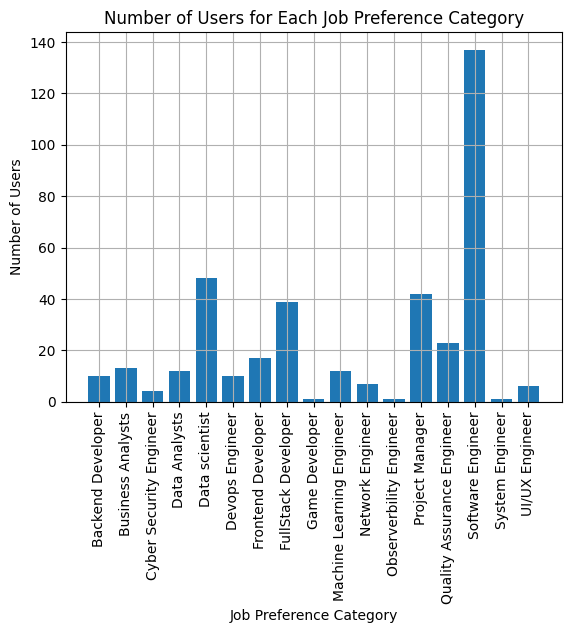

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

User_df = pd.read_csv("User_dataset.csv")

User_df.head()


# Replace the value in the "jobpreference" column
User_df['jobpreference'] = User_df['jobpreference'].replace('AI Machine Learning Engineer', 'Machine Learning Engineer')
User_df['jobpreference'] = User_df['jobpreference'].replace('Deveops Engineer', 'Devops Engineer')
User_df['jobpreference'] = User_df['jobpreference'].replace('fullStack Developer', 'FullStack Developer')
User_df['jobpreference'] = User_df['jobpreference'].replace('Backend Development', 'Backend Developer')
User_df['jobpreference'] = User_df['jobpreference'].replace('cyber security enginner', 'Cyber Security Engineer')
User_df['jobpreference'] = User_df['jobpreference'].replace('Frontend developer', 'Frontend Developer')
User_df['jobpreference'] = User_df['jobpreference'].replace('data analysts', 'Data Analysts')
User_df['jobpreference'] = User_df['jobpreference'].replace('software engineer', 'Software Engineer')
User_df['jobpreference'] = User_df['jobpreference'].replace('netwok engineer', 'Network Engineer')

# Save the updated dataset
User_df.to_csv("User_df_updated.csv", index=False)

User_df_updated = pd.read_csv("User_df_updated.csv")

# Group the dataset by "job preference" and count the number of users in each category
category_counts = User_df_updated['jobpreference'].value_counts()

# Sort the categories in ascending order
category_counts = category_counts.sort_index()

# Create a line graph to visualize the counts
plt.bar(category_counts.index, category_counts.values,)
plt.xlabel('Job Preference Category')
plt.ylabel('Number of Users')
plt.title('Number of Users for Each Job Preference Category')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()




In [ ]:
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    if isinstance(text, str):
        # Remove special characters and digits
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Convert to lowercase
        text = text.lower()
        # Remove stop words
        text = ' '.join(word for word in text.split() if word not in stop_words)
        # Remove duplicate words
        text = ' '.join(OrderedDict.fromkeys(text.split()))
    return text

In [ ]:
# Define the dictionary of job preferences and their required skills
job_preferences_skills = {
    "Backend Developer": ['Python (Programming Language)', 'JavaScript', 'Java', 'C++', 'C#', 'Ruby', 'PHP', 'Go', 'Node.js', 'ASP.NET', 
    'Django', 'Flask', 'Express.js', 'Spring', 'Ruby on Rails', 'Laravel', 'SQL', 'NoSQL', 'MySQL', 'PostgreSQL', 
    'MongoDB', 'Redis', 'Oracle Database', 'RESTful APIs', 'GraphQL', 'Microservices', 'Web Development', 'API Development', 
    'Backend Development', 'Object-Oriented Programming (OOP)', 'Functional Programming', 'Concurrency', 'Asynchronous Programming', 
    'Server-Side Rendering (SSR)', 'Authentication and Authorization', 'JSON Web Tokens (JWT)', 'OAuth', 'Data Structures', 
    'Algorithms', 'Design Patterns', 'Software Development Lifecycle (SDLC)', 'Git', 'Version Control', 'Testing', 
    'Unit Testing', 'Integration Testing', 'Test-Driven Development (TDD)', 'Continuous Integration (CI)', 'Continuous Deployment (CD)', 
    'Agile Methodology', 'Scrum', 'DevOps', 'Linux', 'Shell Scripting', 'Docker', 'Kubernetes', 'Amazon Web Services (AWS)', 
    'Microsoft Azure', 'Google Cloud Platform (GCP)', 'Firebase', 'Serverless Architecture', 'Performance Optimization', 
    'Security', 'Caching', 'Load Balancing', 'Monitoring and Logging', 'Web Servers', 'Apache', 'Nginx', 'Database Design', 
    'ORM (Object-Relational Mapping)', 'SQLAlchemy', 'Hibernate', 'MVC (Model-View-Controller)', 'REST Architecture', 
    'SOAP (Simple Object Access Protocol)', 'WebSocket', 'Message Queues', 'RabbitMQ', 'Kafka', 'GraphQL', 'Socket.io', 
    'Caching Strategies', 'Redis', 'Memcached', 'Content Delivery Network (CDN)', 'Search Engines', 'Elasticsearch', 
    'Solr', 'Microservices Architecture', 'Service Discovery', 'Service Mesh', 'API Gateway', 'Distributed Systems', 
    'Cloud Computing', 'Server Management', 'Performance Monitoring', 'Error Tracking', 'Database Optimization', 'Web Security', 
    'Cross-Site Scripting (XSS)', 'Cross-Site Request Forgery (CSRF)', 'SQL Injection', 'Secure Coding Practices', 'OWASP Top 10', 
    'Web Application Firewall (WAF)', 'Code Review', 'Code Refactoring', 'Dependency Management', 'Package Managers', 
    'Dependency Injection', 'Continuous Integration and Deployment (CI/CD)', 'Infrastructure as Code (IaC)', 'Configuration Management', 
    'Infrastructure Automation', 'Scalability', 'High Availability', 'Fault Tolerance', 'Performance Testing', 'API Documentation', 
    'API Versioning', 'Localization', 'Internationalization', 'Authentication Providers', 'OAuth', 'OpenID Connect', 'SAML', 
    'JWT (JSON Web Tokens)', 'Single Sign-On (SSO)', 'OAuth2', 'Deployment Strategies', 'Blue-Green Deployment', 'Canary Deployment', 
    'Rolling Deployment', 'Feature Toggles', 'A/B Testing', 'Continuous Monitoring', 'Log Management', 'Log Analysis', 
    'Error Tracking', 'Exception Handling', 'Software Architecture', 'Design Patterns', 'Scalable Architecture', 'Database Replication', 
    'Database Sharding', 'CAP Theorem', 'RESTful Architecture'],
    
    "Business Analysts": ['Business Analysis', 'Requirements Gathering', 'Data Analysis', 'Business Process Modeling', 'Process Improvement', 
    'Business Requirements Documentation', 'Functional Requirements', 'Technical Requirements', 'Use Case Analysis', 
    'User Stories', 'Requirements Prioritization', 'Stakeholder Management', 'Project Management', 'Agile Methodology', 
    'Scrum', 'Kanban', 'Waterfall Methodology', 'Business Intelligence', 'Data Visualization', 'Dashboarding', 'Data Warehousing', 
    'Data Modeling', 'Data Mining', 'Data Cleansing', 'Data Integration', 'SQL', 'Database Design', 'ETL (Extract, Transform, Load)', 
    'Statistical Analysis', 'Predictive Analytics', 'Data-driven Decision Making', 'Process Mapping', 'Root Cause Analysis', 
    'Gap Analysis', 'SWOT Analysis', 'Risk Assessment', 'Business Case Development', 'Cost-Benefit Analysis', 'ROI Analysis', 
    'Feasibility Analysis', 'Change Management', 'Business Process Reengineering', 'Business Strategy', 'Market Research', 
    'Competitor Analysis', 'Customer Segmentation', 'User Experience (UX) Design', 'User Interface (UI) Design', 'Prototyping', 
    'Wireframing', 'Requirements Elicitation', 'Requirements Analysis', 'Requirements Validation', 'Requirements Management', 
    'Quality Assurance (QA)', 'Test Planning', 'User Acceptance Testing (UAT)', 'Business Process Automation', 'Workflow Automation', 
    'Process Documentation', 'Process Standardization', 'Process Metrics', 'Agile Modeling', 'Business Rules', 'Decision Analysis', 
    'Decision Modeling', 'Facilitation', 'Interviewing', 'Workshop Facilitation', 'Conflict Resolution', 'Negotiation', 'Critical Thinking', 
    'Problem Solving', 'Analytical Thinking', 'Communication Skills', 'Presentation Skills', 'Data Visualization Tools', 
    'Tableau', 'Power BI', 'QlikView', 'Data Analysis Tools', 'Excel', 'Python', 'R', 'Statistical Analysis Tools', 'SPSS', 
    'SAS', 'Minitab', 'Project Management Tools', 'Jira', 'Trello', 'Asana', 'Collaboration Tools', 'Microsoft Teams', 
    'Slack', 'Confluence', 'Process Modeling Tools', 'BPMN', 'UML', 'Wireframing Tools', 'Balsamiq', 'Axure', 'Mind Mapping', 
    'MindMeister', 'XMind', 'Requirements Management Tools', 'Jama', 'IBM Rational DOORS', 'HP ALM', 'Version Control Systems', 
    'Git', 'SVN', 'Documentation Tools', 'Microsoft Word', 'Google Docs', 'SharePoint', 'Data Analysis Techniques', 'Regression Analysis', 
    'Time Series Analysis', 'Data Visualization Techniques', 'Dashboard Design', 'Heat Maps', 'Pie Charts', 'Bar Charts', 'Line Charts', 
    'Scatter Plots', 'Histograms', 'Pareto Charts', 'Box Plots', 'Gantt Charts', 'Fishbone Diagrams', 'SWOT Analysis Techniques', 
    'PESTEL Analysis', 'Porters Five Forces Analysis', 'Value Stream Mapping', 'Storyboarding', 'Agile Estimation Techniques', 
    'Planning Poker', 'T-Shirt Sizing', 'Relative Sizing', 'Value-Based Prioritization Techniques', 'MoSCoW Method', 'Kano Model', 
    'User Story Mapping', 'Acceptance Criteria Definition',],
    
    "Cyber Security Engineer": ['Cybersecurity', 'Information Security', 'Network Security', 'Vulnerability Assessment', 'Penetration Testing', 
    'Incident Response', 'Security Operations', 'Threat Intelligence', 'Risk Assessment', 'Security Auditing', 'Firewalls', 
    'Intrusion Detection Systems (IDS)', 'Intrusion Prevention Systems (IPS)', 'Web Application Firewalls (WAF)', 'Endpoint Security', 
    'Security Information and Event Management (SIEM)', 'Identity and Access Management (IAM)', 'Encryption', 'Public Key Infrastructure (PKI)', 
    'Secure Coding', 'Security Architecture', 'Security Policies and Procedures', 'Security Awareness Training', 'Data Loss Prevention (DLP)', 
    'Cloud Security', 'Virtual Private Networks (VPNs)', 'Wireless Network Security', 'Mobile Security', 'Web Security', 
    'Application Security', 'Database Security', 'Operating System Security', 'Malware Analysis', 'Security Testing', 'Social Engineering', 
    'Digital Forensics', 'Security Incident Management', 'Risk Management', 'Compliance', 'Regulatory Standards', 'Security Frameworks', 
    'Security Hardening', 'Security Patch Management', 'Security Monitoring', 'Log Analysis', 'Intrusion Analysis', 'Root Cause Analysis', 
    'Security Metrics', 'Security Assessments', 'Security Controls', 'Network Segmentation', 'Secure SDLC', 'Secure DevOps', 
    'Cloud Security Architecture', 'Identity Federation', 'Access Control', 'Authentication', 'Authorization', 'Multi-Factor Authentication (MFA)', 
    'Security Testing Tools', 'Nmap', 'Metasploit', 'Burp Suite', 'Wireshark', 'OWASP tools', 'OpenVAS', 'Nessus', 'Snort', 
    'Security Incident and Event Management (SIEM) Tools', 'Splunk', 'IBM QRadar', 'LogRhythm', 'AlienVault USM', 'Network Security Tools', 
    'Cisco ASA', 'Check Point Firewall', 'Palo Alto Networks', 'Fortinet', 'Juniper Networks', 'Endpoint Security Tools', 'Symantec Endpoint Protection', 
    'McAfee Endpoint Security', 'CrowdStrike Falcon', 'Trend Micro', 'Web Application Firewalls (WAF) Tools', 'ModSecurity', 'Akamai WAF', 
    'Imperva WAF', 'Cloud Security Tools', 'AWS Security Services', 'Azure Security Center', 'Google Cloud Security', 'Container Security Tools', 
    'Docker Security', 'Kubernetes Security', 'Mobile Security Tools', 'AppScan', 'MobileIron', 'Lookout', 'Data Encryption Tools', 'PGP', 
    'OpenSSL', 'BitLocker', 'Hardware Security Modules (HSM)', 'Security Standards and Regulations', 'ISO 27001', 'NIST Cybersecurity Framework', 
    'PCI DSS', 'HIPAA', 'GDPR', 'SOC 2', 'Compliance Audits', 'Risk Assessment Frameworks', 'NIST SP 800-30', 'FAIR', 'CIS Controls', 
    'Security Incident Response Tools', 'IBM Resilient', 'FireEye Helix', 'Rapid7 InsightIDR', 'Cyber Threat Intelligence Tools', 'Recorded Future', 
    'Anomali ThreatStream', 'Digital Forensics Tools', 'EnCase', 'Autopsy', 'Volatility', 'Open Source Security Tools', 'OSSEC', 'Suricata', 
    'Snort', 'Bro','ethical hacking'],
    
    "Data Analysts": ['Data Analysis', 'Data Visualization', 'SQL', 'Python', 'R', 'Excel', 'Tableau', 'Power BI', 'Data Modeling', 
    'Statistical Analysis', 'Descriptive Statistics', 'Inferential Statistics', 'Hypothesis Testing', 'Regression Analysis', 
    'Time Series Analysis', 'Data Mining', 'Data Cleansing', 'Data Wrangling', 'Data Transformation', 'Data Integration', 
    'Data Quality Assurance', 'ETL (Extract, Transform, Load)', 'Database Management', 'Dashboarding', 'Business Intelligence', 
    'Data Interpretation', 'Data Reporting', 'Data Storytelling', 'Data Visualization Tools', 'Pandas', 'NumPy', 'Matplotlib', 
    'Seaborn', 'Scikit-learn', 'NLTK', 'SpaCy', 'Excel Functions', 'VLOOKUP', 'INDEX-MATCH', 'PivotTables', 'Conditional Formatting', 
    'Macros', 'Data Analysis Techniques', 'Segmentation Analysis', 'Cohort Analysis', 'Customer Lifetime Value (CLV)', 
    'Churn Analysis', 'A/B Testing', 'Regression Modeling', 'Decision Trees', 'Random Forests', 'Gradient Boosting', 
    'Clustering Analysis', 'Time Series Forecasting', 'Text Mining', 'Sentiment Analysis', 'Social Network Analysis', 
    'Web Scraping', 'Data Extraction', 'Data Manipulation', 'Data Visualization Techniques', 'Bar Charts', 'Line Charts', 
    'Pie Charts', 'Histograms', 'Scatter Plots', 'Box Plots', 'Heat Maps', 'Geospatial Visualization', 'Data Aggregation', 
    'Data Cleaning Techniques', 'Outlier Detection', 'Missing Data Imputation', 'Data Standardization', 'Data Validation', 
    'Data Exploration', 'Feature Engineering', 'Feature Selection', 'Dimensionality Reduction', 'Principal Component Analysis (PCA)', 
    't-SNE', 'Association Rules', 'Market Basket Analysis', 'Data Governance', 'Data Security', 'Data Privacy', 'Data Ethics', 
    'Data Storage', 'Data Retrieval', 'Data Manipulation', 'Data Warehouse', 'Data Mart', 'Data Lakes', 'Relational Databases', 
    'SQL Server', 'Oracle Database', 'MySQL', 'PostgreSQL', 'NoSQL Databases', 'MongoDB', 'Cassandra', 'Hadoop', 'MapReduce', 
    'Apache Spark', 'Big Data Analytics', 'Data Streaming', 'Real-time Data Processing', 'Cloud Computing', 'Amazon Web Services (AWS)', 
    'Microsoft Azure', 'Google Cloud Platform (GCP)', 'IBM Cloud', 'Data Governance Tools', 'Collibra', 'Informatica Data Governance', 
    'Alation', 'Data Lineage Tools', 'MANTA', 'Data Catalog Tools', 'Apache Atlas', 'Collibra Catalog', 'Data Analytics Tools', 
    'Alteryx', 'KNIME', 'RapidMiner', 'SAS', 'Data Visualization Tools', 'D3.js', 'Plotly', 'Shiny', 'Dash', 'Data Analysis Tools', 
    'Jupyter Notebook', 'RStudio', 'PyCharm', 'Data Querying Tools', 'Google BigQuery', 'Snowflake', 'Teradata', 'Statistical Analysis Tools', 
    'SPSS', 'SAS', 'STATA', 'Statistica', 'Business Intelligence Tools', 'MicroStrategy', 'QlikView', 'Sisense', 'Looker', 'Excel Add-ins'],
    
    "Data scientist": ['Python (Programming Language)', 'R (Programming Language)', 'SQL', 'Java', 'MATLAB', 'C++', 'C', 'Scala','Data Science', 
    'Machine Learning', 'Artificial Intelligence (AI)', 'Big Data', 'Data Analysis', 'Data Mining','Statistical Analysis', 
    'Predictive Modeling', 'Data Visualization', 'Natural Language Processing (NLP)', 'Deep Learning', 'Neural Networks', 
    'Computer Vision', 'Time Series Analysis', 'Unsupervised Learning', 'Supervised Learning', 'Reinforcement Learning', 
    'Dimensionality Reduction', 'Clustering', 'Regression Analysis', 'Hypothesis Testing', 'Feature Engineering', 
    'Feature Selection', 'Data Cleaning', 'Data Wrangling', 'Data Preprocessing', 'Exploratory Data Analysis (EDA)', 
    'Data Integration', 'Data Transformation', 'Data Modeling', 'Data Warehousing', 'Database Administration', 
    'Database Development', 'Data Architecture', 'ETL (Extract, Transform, Load)', 'Data Governance', 'Data Security', 
    'Data Quality Assurance', 'Data Ethics', 'Apache Hadoop', 'Apache Spark', 'Apache Kafka', 'Hive', 'Pig', 'Cassandra', 
    'MongoDB', 'MySQL', 'Oracle Database', 'SQL Server', 'PostgreSQL', 'NoSQL', 'Cloud Computing', 'Amazon Web Services (AWS)', 
    'Microsoft Azure', 'Google Cloud Platform (GCP)', 'IBM Cloud', 'Data Engineering', 'Data Pipelines', 'Data Streaming', 
    'Data Manipulation', 'Data Storage', 'Data Retrieval', 'Distributed Systems', 'Version Control', 'Git', 'GitHub', 
    'Software Engineering', 'Object-Oriented Programming (OOP)', 'Functional Programming', 'Algorithms', 'Data Structures', 
    'Software Development Lifecycle (SDLC)', 'Agile Methodology', 'Scrum', 'Python Libraries', 'NumPy', 'Pandas', 'SciPy', 
    'scikit-learn', 'TensorFlow', 'Keras', 'PyTorch', 'NLTK', 'SpaCy', 'Matplotlib', 'Seaborn', 'Plotly', 'Tableau', 
    'Power BI', 'D3.js', 'Shiny', 'Apache Airflow', 'Docker', 'Kubernetes', 'Linux', 'Unix', 'Shell Scripting', 'Bash', 
    'Data Catalog', 'Data Lineage', 'Data Privacy', 'Data Compliance', 'Data Standards', 'Machine Learning Algorithms', 
    'Linear Regression', 'Logistic Regression', 'Decision Trees', 'Random Forests', 'Gradient Boosting', 'XGBoost', 
    'Support Vector Machines (SVM)', 'Naive Bayes', 'K-Nearest Neighbors (KNN)', 'Convolutional Neural Networks (CNN)', 
    'Recurrent Neural Networks (RNN)', 'Long Short-Term Memory (LSTM)', 'Generative Adversarial Networks (GAN)', 'Autoencoders', 
    'Principal Component Analysis (PCA)', 't-SNE', 'Cluster Analysis', 'K-Means', 'DBSCAN', 'Hierarchical Clustering', 
    'Association Rules', 'Apriori', 'FP-Growth', 'Collaborative Filtering', 'Content-Based Filtering', 'Recommender Systems', 
    'Time Series Forecasting', 'ARIMA', 'Exponential Smoothing'],
    
    "Devops Engineer": [ 'DevOps', 'Continuous Integration', 'Continuous Delivery', 'Continuous Deployment', 'Infrastructure as Code', 
    'Automation', 'Configuration Management', 'Containerization', 'Docker', 'Kubernetes', 'Orchestration', 'Microservices', 
    'CI/CD Tools', 'Jenkins', 'GitLab CI/CD', 'CircleCI', 'Travis CI', 'TeamCity', 'CodePipeline', 'Version Control Systems', 
    'Git', 'GitHub', 'Bitbucket', 'Source Code Management', 'Configuration Management Tools', 'Ansible', 'Chef', 'Puppet', 
    'Terraform', 'Cloud Computing', 'Amazon Web Services (AWS)', 'Microsoft Azure', 'Google Cloud Platform (GCP)', 
    'Infrastructure Management', 'Infrastructure Monitoring', 'Infrastructure Automation', 'Cloud Formation', 'Azure Resource Manager', 
    'Google Cloud Deployment Manager', 'Container Orchestration Tools', 'Kubernetes', 'Docker Swarm', 'Amazon ECS', 'Monitoring Tools', 
    'Prometheus', 'Grafana', 'ELK Stack', 'Splunk', 'Application Performance Monitoring (APM)', 'Logging and Log Management', 
    'Deployment Tools', 'Ansible', 'Chef', 'Puppet', 'Capistrano', 'Scripting Languages', 'Bash', 'Python', 'PowerShell', 
    'Infrastructure Security', 'Network Security', 'Application Security', 'Access Management', 'Identity and Access Management (IAM)', 
    'Security Auditing', 'Security Compliance', 'Incident Response', 'DevOps Methodologies', 'Agile', 'Scrum', 'Kanban', 
    'DevOps Culture', 'Collaboration', 'Communication', 'Problem-Solving', 'Linux Systems Administration', 'Windows Systems Administration', 
    'Network Administration', 'Database Administration', 'Web Servers', 'Apache', 'Nginx', 'Load Balancing', 'Performance Optimization', 
    'High Availability', 'Disaster Recovery', 'Monitoring and Alerting', 'Shell Scripting', 'Build Automation', 'Package Managers', 
    'Artifact Repositories', 'Continuous Testing', 'Unit Testing', 'Integration Testing', 'Performance Testing', 'Security Testing', 
    'Code Analysis', 'Static Code Analysis', 'Code Review', 'Release Management', 'Infrastructure Provisioning', 'Cloud Services', 
    'Serverless Architecture', 'Service Mesh', 'Infrastructure Scalability', 'Infrastructure Resilience', 'Infrastructure Cost Optimization', 
    'Infrastructure Monitoring Tools', 'Nagios', 'Zabbix', 'New Relic', 'Datadog', 'Application Deployment', 'Service Orchestration', 
    'Infrastructure as a Service (IaaS)', 'Platform as a Service (PaaS)', 'Software as a Service (SaaS)', 'Virtualization', 'VMware', 
    'VirtualBox', 'Container Security', 'Secrets Management', 'Continuous Security', 'Infrastructure Testing', 'Configuration Testing', 
    'Compliance Testing', 'Infrastructure Compliance', 'Cloud Governance', 'Cloud Security', 'Infrastructure Monitoring Tools', 'Nagios', 
    'Zabbix', 'Prometheus', 'Application Deployment', 'Service Orchestration', 'Infrastructure as a Service (IaaS)', 
    'Platform as a Service (PaaS)', 'Software as a Service (SaaS)', 'Virtualization', 'VMware', 'VirtualBox', 'Container Security', 
    'Secrets Management', 'Continuous Security', 'Infrastructure Testing', 'Configuration Testing', 'Compliance Testing', 
    'Infrastructure Compliance',],
    
    "FullStack Developer": ['DevOps', 'Continuous Integration', 'Continuous Delivery', 'Continuous Deployment', 'Infrastructure as Code', 
    'Automation', 'Configuration Management', 'Containerization', 'Docker', 'Kubernetes', 'Orchestration', 'Microservices', 
    'CI/CD Tools', 'Jenkins', 'GitLab CI/CD', 'CircleCI', 'Travis CI', 'TeamCity', 'CodePipeline', 'Version Control Systems', 
    'Git', 'GitHub', 'Bitbucket', 'Source Code Management', 'Configuration Management Tools', 'Ansible', 'Chef', 'Puppet', 
    'Terraform', 'Cloud Computing', 'Amazon Web Services (AWS)', 'Microsoft Azure', 'Google Cloud Platform (GCP)', 
    'Infrastructure Management', 'Infrastructure Monitoring', 'Infrastructure Automation', 'Cloud Formation', 'Azure Resource Manager', 
    'Google Cloud Deployment Manager', 'Container Orchestration Tools', 'Kubernetes', 'Docker Swarm', 'Amazon ECS', 'Monitoring Tools', 
    'Prometheus', 'Grafana', 'ELK Stack', 'Splunk', 'Application Performance Monitoring (APM)', 'Logging and Log Management', 
    'Deployment Tools', 'Ansible', 'Chef', 'Puppet', 'Capistrano', 'Scripting Languages', 'Bash', 'Python', 'PowerShell', 
    'Infrastructure Security', 'Network Security', 'Application Security', 'Access Management', 'Identity and Access Management (IAM)', 
    'Security Auditing', 'Security Compliance', 'Incident Response', 'DevOps Methodologies', 'Agile', 'Scrum', 'Kanban', 
    'DevOps Culture', 'Collaboration', 'Communication', 'Problem-Solving', 'Linux Systems Administration', 'Windows Systems Administration', 
    'Network Administration', 'Database Administration', 'Web Servers', 'Apache', 'Nginx', 'Load Balancing', 'Performance Optimization', 
    'High Availability', 'Disaster Recovery', 'Monitoring and Alerting', 'Shell Scripting', 'Build Automation', 'Package Managers', 
    'Artifact Repositories', 'Continuous Testing', 'Unit Testing', 'Integration Testing', 'Performance Testing', 'Security Testing', 
    'Code Analysis', 'Static Code Analysis', 'Code Review', 'Release Management', 'Infrastructure Provisioning', 'Cloud Services', 
    'Serverless Architecture', 'Service Mesh', 'Infrastructure Scalability', 'Infrastructure Resilience', 'Infrastructure Cost Optimization', 
    'Infrastructure Monitoring Tools', 'Nagios', 'Zabbix', 'New Relic', 'Datadog', 'Application Deployment', 'Service Orchestration', 
    'Infrastructure as a Service (IaaS)', 'Platform as a Service (PaaS)', 'Software as a Service (SaaS)', 'Virtualization', 'VMware', 
    'VirtualBox', 'Container Security', 'Secrets Management', 'Continuous Security', 'Infrastructure Testing', 'Configuration Testing', 
    'Compliance Testing', 'Infrastructure Compliance', 'Cloud Governance', 'Cloud Security', 'Infrastructure Monitoring Tools', 'Nagios', 
    'Zabbix', 'Prometheus', 'Application Deployment', 'Service Orchestration', 'Infrastructure as a Service (IaaS)', 
    'Platform as a Service (PaaS)', 'Software as a Service (SaaS)', 'Virtualization', 'VMware', 'VirtualBox', 'Container Security', 
    'Secrets Management', 'Continuous Security', 'Infrastructure Testing', 'Configuration Testing', 'Compliance Testing', 
    'Infrastructure Compliance','HTML', 'CSS', 'JavaScript', 'Responsive Web Design', 'UI/UX Design', 'Front-end Development', 'Web Development', 
    'Back-end Development', 'Full Stack Development', 'RESTful APIs', 'Version Control', 'Git', 'GitHub', 'Front-end Frameworks', 
    'React', 'Angular', 'Vue.js', 'Back-end Frameworks', 'Node.js', 'Express.js', 'Django', 'Ruby on Rails', 'ASP.NET', 
    'Database Systems', 'SQL', 'MySQL', 'PostgreSQL', 'MongoDB', 'NoSQL', 'GraphQL', 'Web Servers', 'Apache', 'Nginx', 
    'Authentication and Authorization', 'OAuth', 'JWT', 'Session Management', 'User Experience (UX)', 'User Interface (UI)', 
    'Cross-platform Development', 'Mobile Application Development', 'Responsive Design', 'Front-end Libraries', 'Bootstrap', 
    'Material-UI', 'Semantic UI', 'Back-end Languages', 'Python', 'JavaScript', 'Ruby', 'Java', 'C#', 'PHP', 'Serverless Architecture', 
    'AWS Lambda', 'Google Cloud Functions', 'Azure Functions', 'Containerization', 'Docker', 'Kubernetes', 'Deployment', 'CI/CD', 
    'Agile Methodology', 'Scrum', 'Kanban', 'Testing', 'Unit Testing', 'Integration Testing', 'End-to-End Testing', 'Debugging', 
    'Performance Optimization', 'Code Quality', 'Code Review', 'Security Best Practices', 'Web Application Security', 'OWASP', 
    'Cross-site Scripting (XSS)', 'Cross-site Request Forgery (CSRF)', 'SQL Injection', 'Session Hijacking', 'Content Management Systems (CMS)', 
    'WordPress', 'Drupal', 'Joomla', 'E-commerce Platforms', 'Shopify', 'Magento', 'WooCommerce', 'Payment Gateways', 'Stripe', 'PayPal', 
    'Third-Party APIs', 'Google Maps API', 'Facebook API', 'Twitter API', 'Payment APIs', 'Websockets', 'Real-time Applications', 
    'Responsive Web Design', 'SEO', 'Google Analytics', 'Webpack', 'Babel', 'TypeScript', 'GraphQL', 'Socket.io', 'Project Management', 
    'Leadership', 'Problem Solving', 'Communication Skills', 'Time Management', 'Collaboration', 'Front-end Build Tools', 
    'CSS Preprocessors', 'Sass', 'Less', 'Front-end Task Runners', 'Gulp', 'Grunt', 'Package Managers', 'npm', 'Yarn', 'Module Bundlers', 
    'Webpack', 'Parcel', 'Build Tools', 'Continuous Integration/Continuous Deployment (CI/CD)', 'Jenkins', 'Travis CI', 'CircleCI', 
    'Code Editors', 'Visual Studio Code', 'Sublime Text', 'Atom', 'Emacs', 'Debugging Tools', 'Chrome DevTools', 'React Developer Tools', 
    'Browser Extensions', 'Performance Monitoring', 'Lighthouse', 'PageSpeed Insights', 'Error Tracking', 'Sentry', 'Browser Compatibility', 
    'Internet Explorer', 'Edge', 'Chrome', 'Firefox', 'Safari', 'Mobile Development', 'React Native', 'Flutter', 'Ionic', 'Accessibility', 
    'WCAG Standards', 'Screen Readers', 'Responsive Testing', 'Usability Testing', 'Code Collaboration', 'Code Reviews', 'Pull Requests', 
    'Project Management Tools', 'Jira','Github','Git'],
    
    "Frontend Developer": [ 'HTML', 'CSS', 'JavaScript', 'Responsive Web Design', 'UI/UX Design', 'Frontend Development', 'Web Development', 
    'Cross-browser Compatibility', 'Semantic HTML', 'CSS Preprocessors', 'Sass', 'Less', 'CSS Frameworks', 'Bootstrap', 
    'Tailwind CSS', 'Material-UI', 'CSS Grid', 'Flexbox', 'JavaScript Frameworks', 'React', 'Angular', 'Vue.js', 
    'State Management', 'Redux', 'Vuex', 'React Context API', 'JavaScript Libraries', 'jQuery', 'Lodash', 'D3.js', 
    'Frontend Build Tools', 'Webpack', 'Parcel', 'Gulp', 'Grunt', 'Version Control Systems', 'Git', 'GitHub', 'GitLab', 
    'Code Editors', 'Visual Studio Code', 'Sublime Text', 'Atom', 'Emacs', 'Responsive Design', 'Mobile First Design', 
    'Progressive Web Apps (PWA)', 'Single Page Applications (SPA)', 'AJAX', 'JSON', 'API Integration', 'Frontend Testing', 
    'Unit Testing', 'Jest', 'React Testing Library', 'Cypress', 'End-to-End Testing', 'Cross-browser Testing', 'Debugging', 
    'Performance Optimization', 'Web Performance Metrics', 'PageSpeed Insights', 'Lighthouse', 'Web Accessibility', 
    'WCAG Standards', 'ARIA', 'Responsive Images', 'SEO', 'Search Engine Optimization', 'Google Analytics', 'Web Analytics', 
    'Browser Developer Tools', 'Chrome DevTools', 'Firefox DevTools', 'Safari Web Inspector', 'Usability Testing', 'User Testing', 
    'UX Research', 'Wireframing', 'Prototyping', 'Responsive Typography', 'Frontend Animation', 'CSS Transitions', 'CSS Animations', 
    'SVG Animation', 'Web Fonts', 'Responsive Videos', 'Frontend Performance Optimization', 'Lazy Loading', 'Code Splitting', 
    'Caching', 'CDN', 'Frontend Security', 'Cross-site Scripting (XSS)', 'Cross-site Request Forgery (CSRF)', 'Content Security Policy (CSP)', 
    'Frontend Best Practices', 'Code Organization', 'Code Documentation', 'Clean Code', 'Performance Monitoring', 'Error Tracking', 
    'Browser Compatibility', 'Responsive Testing', 'Frontend Workflow', 'Task Runners', 'Grunt', 'Gulp', 'Module Bundlers', 
    'Webpack', 'Parcel', 'Package Managers', 'npm', 'Yarn', 'CSS Architecture', 'BEM', 'SMACSS', 'ITCSS', 'CSS-in-JS', 
    'Styled Components', 'Emotion', 'CSS Methodologies', 'Atomic CSS', 'OOCSS', 'ITCSS', 'CSS Reset', 'Normalize.css', 'CSS Variables', 
    'Browser Support', 'IE11', 'Edge', 'Chrome', 'Firefox', 'Safari', 'Performance Budgets', 'Web Performance Optimization', 
    'Critical Rendering Path', 'Image Optimization', 'CDN', 'Asset Optimization', 'Frontend Collaboration', 'Version Control', 
    'Code Reviews', 'Pull Requests', 'Frontend Design Systems', 'Component Libraries', 'Design Tokens', 'Pattern Libraries', 
    'Atomic Design', 'Design to Code', 'Design Handoff', 'Responsive Design Patterns', 'Progressive Enhancement', 'Mobile-First Design', 
    'Frontend Documentation', 'Style Guides', 'Component Documentation'],

    "Software Engineer": ['Programming', 'Software Development', 'Object-Oriented Programming (OOP)', 'Algorithms', 'Data Structures', 'Problem Solving', 
    'Debugging', 'Testing', 'Code Review', 'Version Control', 'Agile Methodology', 'Scrum', 'Kanban', 'Software Design Patterns', 
    'Software Architecture', 'System Design', 'Database Design', 'Web Development', 'Mobile App Development', 'Full-Stack Development', 
    'Front-End Development', 'Back-End Development', 'API Development', 'Microservices', 'Cloud Computing', 'DevOps', 'Continuous Integration (CI)', 
    'Continuous Deployment (CD)', 'Containerization', 'Virtualization', 'Scripting', 'Shell Scripting', 'Automation', 'Web Services', 
    'RESTful APIs', 'SOAP', 'GraphQL', 'Web Security', 'Network Programming', 'Concurrency', 'Parallel Computing', 'Multithreading', 
    'Distributed Systems', 'Big Data', 'Data Processing', 'Machine Learning', 'Artificial Intelligence (AI)', 'Natural Language Processing (NLP)', 
    'Computer Vision', 'Deep Learning', 'Neural Networks', 'Data Analysis', 'Data Visualization', 'Data Mining', 'Database Management', 
    'SQL', 'NoSQL', 'Relational Databases', 'Non-Relational Databases', 'Object-Relational Mapping (ORM)', 'Performance Optimization', 
    'Memory Management', 'Network Protocols', 'Linux', 'Unix', 'Operating Systems', 'Software Testing', 'Unit Testing', 'Integration Testing', 
    'Regression Testing', 'Load Testing', 'Security Testing', 'Quality Assurance (QA)', 'Code Refactoring', 'Code Documentation', 'Code Optimization', 
    'Code Review', 'Code Collaboration', 'Code Versioning', 'Git', 'GitHub', 'Bitbucket', 'Jira', 'Agile Development Tools', 'IDEs (Integrated Development Environments)', 
    'Debugging Tools', 'Testing Frameworks', 'Web Frameworks', 'Front-End Frameworks', 'Back-End Frameworks', 'Mobile App Frameworks', 
    'API Frameworks', 'Dependency Management', 'Package Managers', 'Web Servers', 'Application Servers', 'Cloud Platforms', 'Virtual Machines', 
    'Containerization Platforms', 'Web Security Tools', 'Network Programming Libraries', 'Data Processing Frameworks', 'Machine Learning Frameworks', 
    'Data Analysis Tools', 'Data Visualization Libraries', 'Database Management Systems', 'Query Optimization', 'System Monitoring', 
    'Performance Monitoring', 'Error Monitoring', 'Logging', 'Documentation Tools', 'Collaboration Tools', 'Continuous Integration Tools', 
    'Continuous Deployment Tools', 'Deployment Automation', 'Release Management', 'Project Management', 'Client Management', 'Communication Skills', 
    'Problem Solving', 'Teamwork', 'Leadership', 'Time Management', 'Adaptability', 'Critical Thinking', 'Analytical Skills', 'Creativity', 
    'Innovation', 'Self-Motivation', 'Learning Agility', 'Ethical Behavior', 'Business Acumen', 'Technical Writing', 'Presentation Skills', 
    'Customer Focus', 'User Experience (UX)', 'User Interface (UI) Design', 'Requirements Gathering', 'Technical Support', 'Troubleshooting', 
    'System Administration', 'Data Backup and Recovery', 'Network Configuration', 'System Maintenance', 'System Upgrades', 'Security Management', 
    'Vulnerability Assessment', 'Incident Response', 'Forensics', 'Firewall Configuration'],
    
    "Game Developer": ['Game Development', 'Game Design', 'Game Programming', 'Unity', 'Unreal Engine', 'C#', 'C++', 'Python', 'JavaScript', 'Lua', 
    'Game Mechanics', 'Game Physics', 'Game AI', 'Gameplay Systems', 'Asset Management', '3D Modeling', 'Character Animation', 
    'Level Design', 'UI/UX Design', 'Game Audio', 'Game Networking', 'Virtual Reality (VR)', 'Augmented Reality (AR)', 'Mobile Game Development', 
    'Console Game Development', 'PC Game Development', 'Cross-platform Game Development', 'Game Prototyping', 'Game Testing', 
    'Game Optimization', 'Shader Programming', 'Multiplayer Game Development', 'Game Monetization', 'Game Analytics', 'Version Control', 
    'Git', 'SVN', 'Game Engines', 'Unity', 'Unreal Engine', 'Godot', 'Cocos2d', 'Phaser', 'Panda3D', 'Game Development Frameworks', 
    'SDL', 'libGDX', 'Pygame', 'MonoGame', 'Game Design Patterns', 'Entity-Component System (ECS)', 'Singleton', 'Observer', 
    'State Machine', 'Builder', 'Factory', 'Command', 'Prototype', 'Game Mathematics', 'Linear Algebra', 'Trigonometry', 
    'Geometry', 'Calculus', 'Physics Simulation', 'Collision Detection', 'Pathfinding', 'Artificial Intelligence (AI)', 
    'Behavior Trees', 'Finite State Machines', 'Genetic Algorithms', 'Neural Networks', 'Animation Systems', 'Sprite Animation', 
    'Skeletal Animation', 'Inverse Kinematics', 'Motion Capture', 'Particle Systems', 'Game Audio Systems', 'Sound Design', 
    'Music Composition', 'Audio Editing', 'Audio Integration', 'Game UI/UX', 'User Interface Design', 'User Experience Design', 
    'Wireframing', 'Prototyping', 'Usability Testing', 'Game Level Design', 'Level Editors', 'Puzzle Design', 'Level Balancing', 
    'Game Scripting', 'Game Storytelling', 'Dialogue Systems', 'Cutscenes', 'Quest Systems', 'Narrative Design', 'Game Localization', 
    'Game Networking', 'TCP/IP', 'UDP', 'Socket Programming', 'Peer-to-Peer Networking', 'Client-Server Architecture', 'Game Servers', 
    'Game Prototyping', 'Rapid Prototyping', 'Paper Prototyping', 'Digital Prototyping', 'Game Testing', 'Unit Testing', 
    'Integration Testing', 'User Acceptance Testing', 'Game Quality Assurance (QA)', 'Bug Tracking', 'Debugging', 'Performance Testing', 
    'Game Optimization', 'GPU Optimization', 'CPU Optimization', 'Memory Management', 'Loading Time Optimization', 'Game Distribution', 
    'App Stores', 'Steam', 'GOG', 'Game Monetization', 'In-app Purchases', 'Ads Integration', 'Subscription Models', 
    'Virtual Currency Systems', 'Game Analytics', 'Data Collection', 'Data Analysis', 'Player Behavior Tracking', 'Key Performance Indicators (KPIs)', 
    'Game Marketing', 'Social Media Marketing', 'Community Management', 'Press Releases', 'Content Creation', 'Game Localization', 
    'Translation', 'Cultural Adaptation', 'Game Business Models', 'Freemium', 'Premium', 'Ad-supported', 'Crowdfunding', 'Game Publishing', 
    'Legal Aspects', 'Copyright', 'Trademark', 'Intellectual Property', 'Game Industry Trends'],
    
    "Machine Learning Engineer": ['Machine Learning', 'Deep Learning', 'Neural Networks', 'Supervised Learning', 'Unsupervised Learning', 'Reinforcement Learning', 
    'Natural Language Processing (NLP)', 'Computer Vision', 'Data Science', 'Data Analysis', 'Data Preprocessing', 'Feature Engineering', 
    'Feature Selection', 'Data Cleaning', 'Data Wrangling', 'Data Visualization', 'Model Development', 'Model Evaluation', 'Model Deployment', 
    'Model Interpretability', 'Ensemble Learning', 'Transfer Learning', 'Hyperparameter Tuning', 'Cross-validation', 'Bias-Variance Tradeoff', 
    'Performance Metrics', 'Confusion Matrix', 'Precision and Recall', 'ROC Curve', 'Regression', 'Classification', 'Clustering', 'Dimensionality Reduction', 
    'Recommendation Systems', 'Time Series Analysis', 'Anomaly Detection', 'Text Mining', 'Sentiment Analysis', 'Image Classification', 
    'Object Detection', 'Semantic Segmentation', 'Generative Adversarial Networks (GANs)', 'Recurrent Neural Networks (RNNs)', 
    'Convolutional Neural Networks (CNNs)', 'Transformer Models', 'BERT', 'GPT', 'Autoencoders', 'Decision Trees', 'Random Forests', 
    'Gradient Boosting', 'Support Vector Machines (SVMs)', 'Naive Bayes', 'K-means Clustering', 'DBSCAN', 'Hierarchical Clustering', 
    'Association Rules', 'Apriori Algorithm', 'FP-Growth', 'Recommender Systems', 'Collaborative Filtering', 'Content-Based Filtering', 
    'Matrix Factorization', 'Time Series Forecasting', 'ARIMA', 'LSTM', 'CNN-LSTM', 'XGBoost', 'PyTorch', 'TensorFlow', 'Keras', 'Scikit-learn', 
    'NumPy', 'Pandas', 'Matplotlib', 'Seaborn', 'SQL', 'MongoDB', 'BigQuery', 'Apache Spark', 'Hadoop', 'AWS', 'Azure', 'Google Cloud Platform', 
    'Data Engineering', 'Data Pipelines', 'ETL', 'SQL', 'NoSQL', 'Distributed Systems', 'Software Engineering', 'Python', 'Java', 'C++', 'Scala', 
    'Version Control', 'Git', 'Docker', 'Linux', 'Shell Scripting', 'Deployment', 'Monitoring', 'Collaboration', 'Communication', 'Problem Solving', 
    'Critical Thinking', 'Mathematics', 'Statistics', 'Linear Algebra', 'Probability', 'Optimization', 'Algorithms', 'Data Structures', 'Research', 
    'Experimentation', 'Data Ethics', 'Model Fairness', 'Privacy Preservation', 'Bias and Fairness', 'Interpretability and Explainability', 
    'Responsible AI', 'Ethical Considerations', 'Machine Learning Lifecycle', 'Data Collection', 'Data Annotation', 'Data Labeling', 'Data Augmentation', 
    'Data Governance', 'Data Security', 'Data Privacy', 'Data Compliance', 'Feature Extraction', 'Data Integration', 'Model Training', 'Model Testing', 
    'Model Validation', 'Model Monitoring', 'Model Deployment', 'Cloud Computing', 'Serverless Architecture', 'Containerization', 'DevOps', 
    'Agile Methodology', 'Scrum', 'Communication Skills', 'Presentation Skills', 'Teamwork', 'Project Management', 'Time Management', 'Leadership', 
    'Problem Solving', 'Critical Thinking', 'Decision Making', 'Attention to Detail' ],
    
    "Network Engineer": ['Machine Learning', 'Deep Learning', 'Neural Networks', 'Supervised Learning', 'Unsupervised Learning', 'Reinforcement Learning', 
    'Natural Language Processing (NLP)', 'Computer Vision', 'Data Science', 'Data Analysis', 'Data Preprocessing', 'Feature Engineering', 
    'Feature Selection', 'Data Cleaning', 'Data Wrangling', 'Data Visualization', 'Model Development', 'Model Evaluation', 'Model Deployment', 
    'Model Interpretability', 'Ensemble Learning', 'Transfer Learning', 'Hyperparameter Tuning', 'Cross-validation', 'Bias-Variance Tradeoff', 
    'Performance Metrics', 'Confusion Matrix', 'Precision and Recall', 'ROC Curve', 'Regression', 'Classification', 'Clustering', 'Dimensionality Reduction', 
    'Recommendation Systems', 'Time Series Analysis', 'Anomaly Detection', 'Text Mining', 'Sentiment Analysis', 'Image Classification', 
    'Object Detection', 'Semantic Segmentation', 'Generative Adversarial Networks (GANs)', 'Recurrent Neural Networks (RNNs)', 
    'Convolutional Neural Networks (CNNs)', 'Transformer Models', 'BERT', 'GPT', 'Autoencoders', 'Decision Trees', 'Random Forests', 
    'Gradient Boosting', 'Support Vector Machines (SVMs)', 'Naive Bayes', 'K-means Clustering', 'DBSCAN', 'Hierarchical Clustering', 
    'Association Rules', 'Apriori Algorithm', 'FP-Growth', 'Recommender Systems', 'Collaborative Filtering', 'Content-Based Filtering', 
    'Matrix Factorization', 'Time Series Forecasting', 'ARIMA', 'LSTM', 'CNN-LSTM', 'XGBoost', 'PyTorch', 'TensorFlow', 'Keras', 'Scikit-learn', 
    'NumPy', 'Pandas', 'Matplotlib', 'Seaborn', 'SQL', 'MongoDB', 'BigQuery', 'Apache Spark', 'Hadoop', 'AWS', 'Azure', 'Google Cloud Platform', 
    'Data Engineering', 'Data Pipelines', 'ETL', 'SQL', 'NoSQL', 'Distributed Systems', 'Software Engineering', 'Python', 'Java', 'C++', 'Scala', 
    'Version Control', 'Git', 'Docker', 'Linux', 'Shell Scripting', 'Deployment', 'Monitoring', 'Collaboration', 'Communication', 'Problem Solving', 
    'Critical Thinking', 'Mathematics', 'Statistics', 'Linear Algebra', 'Probability', 'Optimization', 'Algorithms', 'Data Structures', 'Research', 
    'Experimentation', 'Data Ethics', 'Model Fairness', 'Privacy Preservation', 'Bias and Fairness', 'Interpretability and Explainability', 
    'Responsible AI', 'Ethical Considerations', 'Machine Learning Lifecycle', 'Data Collection', 'Data Annotation', 'Data Labeling', 'Data Augmentation', 
    'Data Governance', 'Data Security', 'Data Privacy', 'Data Compliance', 'Feature Extraction', 'Data Integration', 'Model Training', 'Model Testing', 
    'Model Validation', 'Model Monitoring', 'Model Deployment', 'Cloud Computing', 'Serverless Architecture', 'Containerization', 'DevOps', 
    'Agile Methodology', 'Scrum', 'Communication Skills', 'Presentation Skills', 'Teamwork', 'Project Management', 'Time Management', 'Leadership', 
    'Problem Solving', 'Critical Thinking', 'Decision Making', 'Attention to Detail'],
    
    "Observability Engineer": ['Observability', 'Monitoring', 'Logging', 'Tracing', 'Metrics', 'Alerting', 'Distributed Systems', 'Microservices', 'Cloud Computing', 
    'Containerization', 'DevOps', 'Infrastructure as Code (IaC)', 'Kubernetes', 'Docker', 'AWS', 'Azure', 'Google Cloud Platform (GCP)', 
    'Prometheus', 'Grafana', 'Elasticsearch', 'Kibana', 'Jaeger', 'Zipkin', 'OpenTelemetry', 'OpenTracing', 'Splunk', 'Datadog', 'New Relic', 
    'Sysdig', 'Nagios', 'Zabbix', 'InfluxDB', 'Time Series Databases', 'Log Management', 'Log Aggregation', 'Log Analysis', 'Log Parsing', 
    'Log Visualization', 'AIOps', 'Application Performance Monitoring (APM)', 'Infrastructure Monitoring', 'Network Monitoring', 'Server Monitoring', 
    'Cloud Monitoring', 'Incident Management', 'Alert Management', 'Root Cause Analysis (RCA)', 'Anomaly Detection', 'Performance Optimization', 
    'Capacity Planning', 'Failure Prediction', 'Reliability Engineering', 'SLOs (Service Level Objectives)', 'SLIs (Service Level Indicators)', 
    'SLAs (Service Level Agreements)', 'Error Monitoring', 'Exception Tracking', 'Exception Handling', 'Application Logs', 'System Logs', 
    'Access Logs', 'Security Logs', 'Log Retention', 'Log Rotation', 'Log Search', 'Log Filtering', 'Log Querying', 'Log Exporting', 
    'Log Streaming', 'Log Shipping', 'Trace Logs', 'Distributed Tracing', 'Tracing Instrumentation', 'Tracing Analysis', 'Tracing Visualization', 
    'Tracing Correlation', 'Metrics Collection', 'Metrics Storage', 'Metrics Analysis', 'Metrics Visualization', 'Real-time Monitoring', 
    'Historical Monitoring', 'Dashboards', 'Data Visualization', 'Data Analysis', 'Data Aggregation', 'Data Exploration', 'Data Manipulation', 
    'Data Transformation', 'Data Correlation', 'Data Correlation', 'Data Pipelines', 'Data Integration', 'Alerting Systems', 'Threshold Alerts', 
    'Anomaly Alerts', 'Event Correlation', 'Incident Response', 'Incident Escalation', 'Incident Communication', 'Playbooks', 'Runbooks', 
    'Orchestration', 'Automation', 'Scripting', 'Programming', 'Python', 'Bash', 'PowerShell', 'APIs', 'RESTful API', 'JSON', 'Data Formats', 
    'ETL (Extract, Transform, Load)', 'Data Warehousing', 'Data Modeling', 'Data Governance', 'Change Management', 'Agile Methodology', 'Scrum', 
    'Kanban', 'Collaboration', 'Communication', 'Problem Solving', 'Critical Thinking', 'Troubleshooting', 'Analytical Skills', 'Attention to Detail', 
    'Documentation', 'Technical Writing', 'Presentation Skills', 'Service-Oriented Architecture (SOA)', 'Infrastructure Monitoring Tools', 
    'Application Monitoring Tools', 'Container Monitoring Tools', 'Cloud Monitoring Tools', 'Log Management Tools', 'Log Analysis Tools', 
    'AIOps Platforms', 'APM Tools', 'Alerting Systems', 'Metrics Collection Tools', 'Time Series Databases', 'Distributed Tracing Tools', 
    'Data Visualization Tools', 'Dashboarding Tools', 'Automation Tools', 'Scripting Languages'],
    
    "Project Manager": ['Project Management', 'Project Planning', 'Project Execution', 'Project Monitoring', 'Project Control', 'Project Coordination', 
    'Project Scope Management', 'Project Time Management', 'Project Cost Management', 'Project Quality Management', 'Project Risk Management', 
    'Project Communication Management', 'Project Stakeholder Management', 'Project Integration Management', 'Project Leadership', 
    'Project Team Management', 'Project Resource Management', 'Project Procurement Management', 'Agile Methodology', 'Scrum', 'Kanban', 
    'Waterfall Methodology', 'Hybrid Project Management', 'Project Lifecycle Management', 'Project Initiation', 'Project Requirements Gathering', 
    'Project Planning', 'Work Breakdown Structure (WBS)', 'Project Scheduling', 'Gantt Charts', 'Critical Path Method (CPM)', 'PERT', 
    'Resource Allocation', 'Risk Assessment', 'Risk Mitigation', 'Change Management', 'Project Execution', 'Task Management', 'Progress Tracking', 
    'Status Reporting', 'Milestone Tracking', 'Project Control', 'Quality Assurance', 'Quality Control', 'Quality Management', 'Performance Measurement', 
    'Budgeting', 'Cost Control', 'Cost Estimation', 'Cost Management', 'Earned Value Management (EVM)', 'Financial Reporting', 'Vendor Management', 
    'Contract Management', 'Procurement', 'Negotiation', 'Stakeholder Engagement', 'Stakeholder Analysis', 'Stakeholder Communication', 'Conflict Resolution', 
    'Team Building', 'Team Collaboration', 'Team Motivation', 'Team Development', 'Leadership', 'Decision Making', 'Problem Solving', 'Risk Management', 
    'Issue Management', 'Scope Management', 'Change Control', 'Communication Management', 'Documentation', 'Meeting Facilitation', 'Presentation Skills', 
    'Influencing Skills', 'Negotiation Skills', 'Time Management', 'Organizational Skills', 'Analytical Skills', 'Critical Thinking', 'Conflict Management', 
    'Emotional Intelligence', 'Adaptability', 'Attention to Detail', 'Customer Relationship Management (CRM)', 'Client Management', 'Client Communication', 
    'Project Governance', 'Project Auditing', 'Project Documentation', 'Lessons Learned', 'Project Closure', 'Post-Implementation Review', 
    'Continuous Improvement', 'Project Management Tools', 'Project Management Software', 'Microsoft Project', 'Jira', 'Trello', 'Asana', 'Basecamp', 
    'Smartsheet', 'Wrike', 'Monday.com', 'Agile Tools', 'Version Control', 'Risk Management Tools', 'Financial Management Tools', 'Procurement Tools', 
    'Stakeholder Management Tools', 'Communication Tools', 'Collaboration Tools', 'Presentation Tools', 'Virtual Collaboration Tools', 
    'Documentation Tools', 'Time Tracking Tools', 'Resource Management Tools', 'Reporting Tools', 'Status Tracking Tools', 'Gantt Chart Tools', 
    'Team Management Tools', 'Change Management Tools', 'Task Management Tools', 'Quality Management Tools', 'Scope Management Tools', 
    'Project Portfolio Management (PPM)', 'Project Management Certifications', 'Project Management Professional (PMP)', 'Certified Scrum Master (CSM)', 
    'Agile Certified Practitioner (PMI-ACP)', 'PRINCE2', 'Six Sigma', 'Lean Methodology', 'ITIL', 'Business Analysis', 'Process Improvement', 
    'Organizational Change Management', 'Business Strategy', 'Financial Management', 'Contract Negotiation', 'Contract Management', 
    'Vendor Evaluation', 'Performance Metrics'],
    
    "Quality Assurance Engineer": ['Quality Assurance', 'Software Testing', 'Test Planning', 'Test Strategy', 'Test Execution', 'Test Automation', 'Manual Testing', 
    'Functional Testing', 'Regression Testing', 'Integration Testing', 'System Testing', 'User Acceptance Testing (UAT)', 
    'Performance Testing', 'Load Testing', 'Stress Testing', 'Security Testing', 'Penetration Testing', 'Test Case Design', 
    'Test Case Execution', 'Defect Tracking', 'Defect Management', 'Defect Triage', 'Defect Root Cause Analysis', 'Test Reporting', 
    'Test Documentation', 'Test Metrics', 'Test Coverage', 'Test Environment Setup', 'Test Data Management', 'Test Frameworks', 
    'Test Planning Tools', 'Test Management Tools', 'Test Automation Tools', 'Test Execution Tools', 'Test Reporting Tools', 
    'Continuous Integration (CI)', 'Continuous Delivery (CD)', 'Agile Methodology', 'Scrum', 'Kanban', 'Waterfall Methodology', 
    'Defect Prevention', 'Quality Control', 'Quality Management', 'Process Improvement', 'Risk Analysis', 'Requirement Analysis', 
    'Traceability Matrix', 'Root Cause Analysis (RCA)', 'Black Box Testing', 'White Box Testing', 'Gray Box Testing', 
    'Static Testing', 'Dynamic Testing', 'Unit Testing', 'Integration Testing', 'System Testing', 'Acceptance Testing', 
    'Regression Testing', 'Usability Testing', 'Accessibility Testing', 'Compatibility Testing', 'Performance Testing', 
    'Load Testing', 'Stress Testing', 'Security Testing', 'Penetration Testing', 'Exploratory Testing', 'Ad Hoc Testing', 
    'Test Data Creation', 'Test Data Management', 'Test Environment Setup', 'Test Execution', 'Test Reporting', 'Test Coverage', 
    'Test Metrics', 'Test Planning Tools', 'Test Management Tools', 'Test Automation Tools', 'Defect Tracking Tools', 
    'Version Control', 'Test Frameworks', 'Scripting Languages', 'Programming Languages', 'Selenium', 'Appium', 'JUnit', 'TestNG', 
    'Cucumber', 'Jenkins', 'Travis CI', 'CircleCI', 'GitLab CI/CD', 'TeamCity', 'JIRA', 'Bugzilla', 'HP ALM', 'TestRail', 
    'Zephyr', 'TFS', 'Postman', 'LoadRunner', 'JMeter', 'Gatling', 'Burp Suite', 'OWASP', 'SonarQube', 'Code Coverage Tools', 
    'Code Review Tools', 'Performance Monitoring Tools', 'Security Testing Tools', 'Accessibility Testing Tools', 
    'Usability Testing Tools', 'Test Management Tools', 'Defect Tracking Tools', 'Requirements Management Tools', 'API Testing', 
    'Web Testing', 'Mobile Testing', 'Desktop Application Testing', 'Cloud Testing', 'Database Testing', 'Integration Testing', 
    'UI Testing', 'UX Testing', 'Cross-Browser Testing', 'Cross-Platform Testing', 'Localization Testing', 'Internationalization Testing', 
    'Agile Testing', 'Test-Driven Development (TDD)', 'Behavior-Driven Development (BDD)', 'Continuous Integration/Continuous Delivery (CI/CD)', 
    'DevOps', 'Scalability Testing', 'Accessibility Standards', 'Quality Standards', 'Test Process Improvement', 'Test Strategy Development', 
    'Test Plan Creation', 'Test Estimation', 'Risk-Based Testing', 'Test Team Management', 'Collaboration', 'Communication'],
    
    
    
    "System Engineer": ['System Engineering', 'System Design', 'System Architecture', 'System Integration', 'System Administration', 'System Analysis', 
    'Infrastructure Design', 'Network Design', 'Server Administration', 'Operating Systems', 'Linux', 'Windows Server', 'Unix', 
    'Virtualization', 'VMware', 'Hyper-V', 'KVM', 'Cloud Computing', 'Amazon Web Services (AWS)', 'Microsoft Azure', 
    'Google Cloud Platform (GCP)', 'Infrastructure as Code (IaC)', 'Configuration Management', 'Ansible', 'Puppet', 'Chef', 'Salt', 
    'Containerization', 'Docker', 'Kubernetes', 'Monitoring', 'Performance Monitoring', 'Network Monitoring', 'Server Monitoring', 
    'Log Monitoring', 'Security Monitoring', 'Alerting', 'Incident Management', 'Troubleshooting', 'Root Cause Analysis (RCA)', 
    'Backup and Recovery', 'Disaster Recovery', 'High Availability', 'Load Balancing', 'Firewalls', 'Network Security', 'VPN', 
    'Intrusion Detection and Prevention Systems (IDPS)', 'Access Control', 'Identity and Access Management (IAM)', 'Authentication', 
    'Authorization', 'Encryption', 'Network Protocols', 'TCP/IP', 'DNS', 'DHCP', 'HTTP', 'HTTPS', 'FTP', 'SMTP', 'SSH', 'VPN Protocols', 
    'Routing and Switching', 'LAN', 'WAN', 'VLAN', 'NAT', 'Firewall Rules', 'Network Segmentation', 'Network Troubleshooting', 
    'Network Performance Optimization', 'Storage', 'Storage Area Networks (SAN)', 'Network Attached Storage (NAS)', 'RAID', 
    'File Systems', 'Data Backup', 'Data Replication', 'Data Deduplication', 'Server Hardware', 'Server Configuration', 
    'Server Maintenance', 'Server Upgrades', 'Data Centers', 'Data Center Design', 'Data Center Management', 'Power and Cooling', 
    'Cabling Infrastructure', 'Patch Management', 'Change Management', 'Capacity Planning', 'Asset Management', 'System Documentation', 
    'Scripting', 'Bash', 'PowerShell', 'Python', 'Shell Scripting', 'Automation', 'Scripting Languages', 'Version Control', 'Git', 
    'SVN', 'Continuous Integration/Continuous Delivery (CI/CD)', 'Agile Methodology', 'Scrum', 'Infrastructure Monitoring Tools', 
    'Configuration Management Tools', 'Virtualization Platforms', 'Cloud Management Platforms', 'Network Monitoring Tools', 
    'Security Monitoring Tools', 'Backup and Recovery Tools', 'Troubleshooting Tools', 'Firewall Management Tools', 'Server Hardware Tools', 
    'Storage Management Tools', 'Data Center Infrastructure Management (DCIM) Tools', 'ITIL', 'IT Service Management', 'Change Management Processes', 
    'Incident Management Processes', 'Problem Management Processes', 'Capacity Planning Tools', 'IT Infrastructure Design', 'IT Architecture', 
    'IT Security', 'IT Governance', 'Risk Management', 'Disaster Recovery Planning', 'Business Continuity', 'Compliance', 'IT Audits', 
    'Vendor Management', 'Technical Support', 'Documentation Skills', 'Analytical Skills', 'Problem-Solving Skills', 'Communication Skills', 
    'Collaboration Skills', 'Project Management', 'Service Level Agreements (SLAs)', 'ITIL Framework', 'Network Design and Architecture', 
    'Storage Design and Architecture', 'Server Hardware Configuration', 'Network Protocols and Standards', 'Infrastructure Automation'],
   
    "UI/UX Engineer": ['User Interface (UI) Design', 'User Experience (UX) Design', 'User-Centered Design (UCD)', 'Human-Computer Interaction (HCI)', 
    'Information Architecture', 'Wireframing', 'Prototyping', 'Interaction Design', 'Visual Design', 'Responsive Design', 
    'Mobile App Design', 'Web Design', 'Usability Testing', 'User Research', 'Persona Creation', 'User Flows', 'User Stories', 
    'User Journey Mapping', 'Task Analysis', 'Card Sorting', 'A/B Testing', 'User Interviews', 'Contextual Inquiry', 
    'Cognitive Walkthrough', 'Heuristic Evaluation', 'Visual Hierarchy', 'Typography', 'Color Theory', 'Icon Design', 
    'Graphic Design', 'Illustration', 'Motion Design', 'Animation', 'Design Systems', 'Style Guides', 'Pattern Libraries', 
    'UI Frameworks', 'Sketch', 'Adobe XD', 'Figma', 'InVision', 'Principle', 'Axure', 'Zeplin', 'Adobe Creative Suite', 
    'HTML', 'CSS', 'JavaScript', 'Front-End Development', 'Responsive Web Design', 'Cross-Browser Compatibility', 
    'Accessibility', 'Information Design', 'Data Visualization', 'Visual Effects', 'Usability Principles', 'User-Centric Design', 
    'Visual Design Principles', 'Design Thinking', 'Creative Problem Solving', 'Empathy', 'Collaboration', 'Communication', 
    'Critical Thinking', 'Analytical Skills', 'User Profiling', 'User Needs Analysis', 'User Testing', 'Iterative Design', 
    'Rapid Prototyping', 'Wireframe Tools', 'Prototyping Tools', 'UI Design Tools', 'Design Collaboration Tools', 'Usability Testing Tools', 
    'User Research Methods', 'Design Thinking Process', 'Visual Design Tools', 'Interaction Design Tools', 'User Flow Tools', 
    'Information Architecture Tools', 'Web Development Skills', 'Responsive Design Principles', 'Mobile App Design Guidelines', 
    'Cross-Platform Design', 'Typography Principles', 'Color Theory and Contrast', 'Iconography Principles', 'Motion Design Principles', 
    'Design System Tools', 'Style Guide Tools', 'Pattern Library Tools', 'Front-End Development Tools', 'CSS Frameworks', 
    'Web Accessibility Guidelines', 'Data Visualization Techniques', 'Usability Testing Methods', 'User-Centric Design Principles', 
    'User Profiling Techniques', 'Iterative Design Process', 'Collaborative Design', 'Visual Design Principles and Elements', 
    'User Flow Techniques', 'Prototyping Techniques', 'User Research Analysis', 'User Needs Prioritization', 'Task Analysis Methods', 
    'User Storytelling', 'Storyboarding', 'Design Review and Critique', 'Responsive Design Testing', 'User Interface Testing', 
    'User Experience Evaluation', 'User Testing Feedback Analysis', 'User-Centered Design Process', 'Design Documentation', 
    'User Interface Design Patterns', 'Visual Design Trends', 'Interaction Design Trends', 'Color Psychology', 'Usability Heuristics', 
    'Design Usability Guidelines', 'Design Collaboration Platforms', 'Design Thinking Frameworks', 'Design Sprints', 
    'Design Research Methods', 'Design Data Analysis', 'Design Presentation Skills', 'Design Decision Making', 'Design Strategy', 
    'Design Leadership', 'Project Management', 'Agile Methodology', 'Scrum', 'Teamwork', 'Time Management', 'Client Management', 
    'Stakeholder Communication', 'Presentation Skills', 'Problem Solving']
}


In [ ]:
# Preprocess the skills for each job post
preprocessed_job_preferences_skills = {}
for job_post, skills in job_preferences_skills.items():
    preprocessed_skills = [preprocess_text(skill) for skill in skills]
    preprocessed_job_preferences_skills[job_post] = preprocessed_skills

In [ ]:
# Check if the "Missing Skills" column exists and drop it if it does
if 'Missing Skills' in User_df_updated.columns:
    user_dataset = User_df_updated.drop('Missing Skills', axis=1)

User_df_updated['allSkills'] = User_df_updated['allSkills'].apply(preprocess_text)

# Iterate over each user in the user dataset
for index, user in User_df_updated.iterrows():
    # Get the acquired skills for the current user
    acquired_skills = user['allSkills']
    
    # Get the job preference for the current user
    job_preference = user['jobpreference']
    
    # Process the acquired skills (if needed)
    
    # (e.g., convert to lowercase, remove punctuation, etc.)
    
    # Check if acquired skills exist and are not empty
    if isinstance(acquired_skills, str) and acquired_skills.strip():
        # Split the acquired skills into individual skill items
        acquired_skills = acquired_skills.split(',')
        
        # Remove leading/trailing whitespaces from skills
        acquired_skills = [skill.strip() for skill in acquired_skills]
    else:
        # Handle the case when acquired skills are missing or empty
        acquired_skills = []
    
    # Compare acquired skills with job preference to find missing skills
    missing_skills = [skill for skill in preprocessed_job_preferences_skills.get(job_preference, []) if skill not in acquired_skills]

    # Create a new column "Missing Skills" and assign the missing skills for the current user
    User_df_updated.at[index, 'Missing Skills'] = ', '.join(missing_skills)
    
   # Print the missing skills and job preference for the current user
    print("User:", user['userId'])
    print("Missing skills:", missing_skills)
    print("Job preference:", job_preference)
    print("----------------------------------------")


User: 642925511
Missing skills: ['html', 'css', 'javascript', 'responsive web design', 'uiux design', 'frontend development', 'web development', 'crossbrowser compatibility', 'semantic html', 'css preprocessors', 'sass', 'less', 'css frameworks', 'bootstrap', 'tailwind css', 'materialui', 'css grid', 'flexbox', 'javascript frameworks', 'react', 'angular', 'vuejs', 'state management', 'redux', 'vuex', 'react context api', 'javascript libraries', 'jquery', 'lodash', 'djs', 'frontend build tools', 'webpack', 'parcel', 'gulp', 'grunt', 'version control systems', 'git', 'github', 'gitlab', 'code editors', 'visual studio code', 'sublime text', 'atom', 'emacs', 'responsive design', 'mobile first design', 'progressive web apps pwa', 'single page applications spa', 'ajax', 'json', 'api integration', 'frontend testing', 'unit testing', 'jest', 'react testing library', 'cypress', 'endtoend testing', 'crossbrowser testing', 'debugging', 'performance optimization', 'web performance metrics', 'pages

In [ ]:
# Load the dataset
df = pd.read_csv('combined_course_dataset.csv')

df['Course Rating']= df['Course Rating'].replace('None',4.5)

df['Skills_Text'] = df['Course Name'] + df['Course Description'] + df['Skills']

In [ ]:


# Define the modified encode_string function
def encode_string(input_string, substrings):
    if isinstance(input_string, str):
        encoded_string = input_string
        for substring in substrings:
            if ' ' in substring:
                encoded_substring = substring.replace(" ", "_")
                encoded_string = re.sub(r'\b' + re.escape(substring) + r'\b', encoded_substring, encoded_string)
        return encoded_string
    else:
        return input_string

# Apply encoding to the "skills_text" column
encoded_skills_text = []
for row in df["Skills_Text"]:
    encoded_row = encode_string(row, substrings)
    encoded_skills_text.append(encoded_row)

# Create a new column with the encoded skills_text
df["encoded_skills_text"] = np.array(encoded_skills_text)

In [ ]:
df["encoded_skills_text"] = df["encoded_skills_text"].apply(preprocess_text)

# Fill in missing values with an empty string
df["encoded_skills_text"].fillna('', inplace=True)

# Extract skills and course names from the dataset
skills = df["encoded_skills_text"].tolist()
course_names = df['Course Name'].tolist()

# Create a CountVectorizer to convert skills into numerical features
vectorizer = CountVectorizer()

# Fit the vectorizer on skills to learn the vocabulary
vectorizer.fit(skills)

# Transform skills into feature vectors
X = vectorizer.transform(skills)

# Create the target variable
y = course_names



# Create and train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X, y)



MultinomialNB()

# Create empty lists to store recommendations, missing skills, and user feedback
recommendations = []
missing_skills_list = []
user_feedback_scores = []

# Preprocess the missing skills
User_df_updated['Missing Skills'] = User_df_updated['Missing Skills'].apply(preprocess_text)

for index, row in User_df_updated.head(5).iterrows():
    # Get the missing skills for each user
    missing_skills = row['Missing Skills']
    
    # Preprocess the missing skills
    missing_skills = preprocess_text(missing_skills)
    
    # Transform the missing skills into a feature vector using the trained CountVectorizer
    missing_skills_vector = vectorizer.transform([missing_skills])
    
    # Get the recommended course for the user
    recommended_course = model.predict(missing_skills_vector)[0]
    
    # Print the missing skills, recommendation, and prompt for user feedback
    print("Missing Skills for User", index+1, ":", missing_skills)
    print("Recommended Course for User", index+1, ":", recommended_course)
    
    # Get user feedback score (e.g., on a scale of 1-10)
    user_feedback_score = int(input("Enter user feedback score (1-10) for appropriate recommendation: "))
    
    # Append the missing skills, recommendation, and user feedback score to the respective lists
    missing_skills_list.append(missing_skills)
    recommendations.append(recommended_course)
    user_feedback_scores.append(user_feedback_score)
    

# Calculate final evaluation as a percentage
total_users = len(user_feedback_scores)
positive_feedback_count = sum(feedback_score >= 7 for feedback_score in user_feedback_scores)
final_evaluation_percentage = (positive_feedback_count / total_users) * 100

# Print final evaluation percentage
print("Final Evaluation: {:.2f}%".format(final_evaluation_percentage))


In [ ]:
# Create empty lists to store recommendations, missing skills, and user feedback
recommendations = []
missing_skills_list = []
user_feedback_scores = []

# Preprocess the missing skills
User_df_updated['Missing Skills'] = User_df_updated['Missing Skills'].apply(preprocess_text)

for index, row in User_df_updated.head(5).iterrows():
    # Get the missing skills for each user
    missing_skills = row['Missing Skills']
    
    # Preprocess the missing skills
    missing_skills = preprocess_text(missing_skills)
    
    # Transform the missing skills into a feature vector using the trained CountVectorizer
    missing_skills_vector = vectorizer.transform([missing_skills])
    
    # Get the recommended course for the user
    recommended_course = model.predict(missing_skills_vector)[0]
    
    # Print the missing skills, recommendation, and prompt for user feedback
    print("Missing Skills for User", index+1, ":", missing_skills)
    print("Recommended Course for User", index+1, ":", recommended_course)
    
    # Get user feedback score (e.g., on a scale of 1-10)
    user_feedback_score = int(input("Enter user feedback score (1-10) for appropriate recommendation: "))
    
    # Append the missing skills, recommendation, and user feedback score to the respective lists
    missing_skills_list.append(missing_skills)
    recommendations.append(recommended_course)
    user_feedback_scores.append(user_feedback_score)
    

# Calculate overall evaluation based on user feedback scores
positive_feedback_count = sum(feedback_score >= 7 for feedback_score in user_feedback_scores)
neutral_feedback_count = sum(4 <= feedback_score < 7 for feedback_score in user_feedback_scores)
negative_feedback_count = sum(feedback_score < 4 for feedback_score in user_feedback_scores)

overall_evaluation = "Positive" if positive_feedback_count > neutral_feedback_count + negative_feedback_count else "Negative"

# Print overall evaluation
print("Overall Evaluation:", overall_evaluation)


Missing Skills for User 1 : html css javascript responsive web design uiux frontend development crossbrowser compatibility semantic preprocessors sass less frameworks bootstrap tailwind materialui grid flexbox react angular vuejs state management redux vuex context api libraries jquery lodash djs build tools webpack parcel gulp grunt version control systems git github gitlab code editors visual studio sublime text atom emacs mobile first progressive apps pwa single page applications spa ajax json integration testing unit jest library cypress endtoend debugging performance optimization metrics pagespeed insights lighthouse accessibility wcag standards aria images seo search engine google analytics browser developer chrome devtools firefox safari inspector usability user ux research wireframing prototyping typography animation transitions animations svg fonts videos lazy loading splitting caching cdn security crosssite scripting xss request forgery csrf content policy csp best practices 

In [1]:
model.save('multinomial_model.h5')


NameError: ignored